In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
import sys

def load_jsd(filename) :
    y = []
    x = []
    with open(filename) as file :
        for line in file :
            x.append(float(line.split(" ")[0]))
            y.append(float(line.split(" ")[1]))
    return x,y

In [2]:
def plot_map(files, pos=0):
    fig1, ax1 = plt.subplots()
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    if (not (type(files) is list)):
        files=[files]
    pointx=[]
    pointy=[]
    for rf in files:
        if(not os.path.isfile(rf)) :
            print(rf + " does not exist")
            continue
        f=open(rf)
        for l in f.readlines():
            l=l.rstrip()
            lc=list(map(float, l.split(" ")))
            pointx.append(lc[0+pos])
            pointy.append(lc[2+pos])
        f.close()
    if(len(pointx) == 0 or len(pointy) == 0) :
        return
    print("nb points: "+str(len(pointx))+" min=(%.2f, %.2f)"%(min(pointx),min(pointy))+" max=(%.2f,%.2f)"%(max(pointx),max(pointy)))
    ax1.plot(pointx,pointy,'.')
    plt.show()
def plot_map_from(folder_name,id1,id2) :
    files = []
    for folder in os.listdir(folder_name) :
        if folder.split('_')[0] != "legged" :
            continue
        if folder.split('_')[id1] == id2 :
            files.append(folder_name + '/' + folder + '/bd_004000.log')
    plot_map(files,3)
def plot_map_hm(folder_name,pos,name) :
    list_x = []
    list_y = []
    gen_nb = []
    fig1, ax1 = plt.subplots()
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    for file in os.listdir(folder_name) :
        if file.split('_')[0] != name :
            continue
        if int(file.split('_')[-1].split('.')[0])%100 != 0 :
            continue
        gen_nb.append(int(file.split('_')[-1].split('.')[0]))
        pointx = []
        pointy = []
        f=open(folder_name + "/" + file)
        for l in f.readlines():
            l=l.rstrip()
            lc=list(map(float, l.split(" ")))
            pointx.append(lc[0+pos])
            pointy.append(lc[2+pos])
        f.close()
        ratio = float(gen_nb[-1])/4000
        ax1.plot(pointx,pointy,'.',color=(ratio,0,0))
    plt.show()

In [3]:
import numpy as np

def median_perc(data) : 
    median = np.zeros(data.shape[1]) 
    perc_25 = np.zeros(data.shape[1]) 
    perc_75 = np.zeros(data.shape[1]) 
    for i in range(0, len(median)): 
        median[i] = np.median(data[:, i]) 
        perc_25[i] = np.percentile(data[:, i], 25) 
        perc_75[i] = np.percentile(data[:, i], 75) 
    return median, perc_75, perc_25


In [4]:
import os

def load_test(folder_name,id1,id2,nb_rep) :
    i = 0
    for folder in os.listdir(folder_name) :
        if folder.split('_')[0] != "legged" :
            continue
        if folder.split('_')[id1] == id2 :
            print(folder)
            x,y = load_jsd(folder_name + folder + "/JSD.dat")
            print(len(y))
            i += 1

def load_from(folder_name,id1,id2,nb_rep,nb_gen,jsd) :
    data = np.zeros((nb_rep,nb_gen))
    i = 0
    for folder in os.listdir(folder_name) :
        if folder.split('_')[0] != "legged" :
            continue
        if folder.split('_')[id1] == id2 :
            print(folder)
            x,y = load_jsd(folder_name + folder + jsd)
            if(len(y) < nb_gen) :
                continue
            data[i, :] = y[:nb_gen]
            i += 1
    median, perc_75, perc_25 = median_perc(data)
    x = x[:nb_gen]
    return x, median, perc_75, perc_25

def plot_data_from(folder_name,id1,id2,nb_rep,nb_gen,name,ax1,jsd) :
    x, median, perc_75, perc_25 = load_from(folder_name,id1,id2,nb_rep,nb_gen,jsd)
    ax1.plot(x,median,linewidth=2,label=name)
    ax1.fill_between(x,perc_75,median,alpha=.2)
    ax1.fill_between(x,perc_25,median,alpha=.2)
    
    

def plot_single_run_jsd(folder_name,folder,ax1,jsdname) :
    x,y = load_jsd(folder_name + folder + jsdname)
    ax1.plot(x,y,linewidth=2)

    
def plot_all_data_from(folder_name,id1,nb_rep,nb_gen,r,ax1) :
    medians = []
    percs_25 = []
    percs_75 = []
    names = []
    for k in range(r[0],r[1]) :
        if(k == 0) :
            x, median, perc_75, perc_25 = load_from(folder_name,id1,'0',nb_rep,nb_gen)
            medians.append(median)
            percs_25.append(perc_25)
            percs_75.append(perc_75)
            if id1 == 4 :
                names.append("ff_0")
            if id1 == 5 :
                names.append("rec_0")
        else :
            x, median, perc_75, perc_25 = load_from(folder_name,id1,str(2**k),nb_rep,nb_gen)
            medians.append(median)
            percs_25.append(perc_25)
            percs_75.append(perc_75)
            if id1 == 4 :
                names.append("ff_" + str(2**k))
            if id1 == 5 :
                names.append("rec_" + str(2**k))

    i = 0
    for m in medians :
        ax1.plot(x,m,linewidth=2,label=names[i])
        ax1.fill_between(x,percs_75[i],m,alpha=.2)
        ax1.fill_between(x,percs_25[i],m,alpha=.2)
        i += 1


In [5]:
def load_dnn_data(file_name) :
    with open(file_name) as f :
        gen = int(file_name.split('_')[-1].split('.')[0])
        neurons_dat = [int(n) for n in f.readline().split(' ')[:-1]]
        connections_dat = [int(c) for c in f.readline().split(' ')[:-1]]
    
    return gen, neurons_dat, connections_dat    

def plot_dnn_data(folder_name,id0,id1,id2,nb_gen,pop_size,axs) :
    neurons_data = np.zeros((1,nb_gen))
    connections_data = np.zeros((1,nb_gen))
    for folder in os.listdir(folder_name) :
        if folder.split('_')[0] != id0 :
            continue
        if folder.split('_')[id1] == id2 :
            gen_vct = []
            neurons = np.zeros((nb_gen,pop_size))
            connections = np.zeros((nb_gen,pop_size))
            i = 0
            for file_name in os.listdir(folder_name + '/' + folder) :
                if file_name.split('_')[0] != "neat" :
                    continue
                gen, ndat, cdat = load_dnn_data(folder_name + '/' + folder + '/' + file_name)
                gen_vct.append(gen)
                if(len(ndat) == 0) :
                    continue
                neurons[i ,:] = ndat
                connections[i  ,:] = cdat
                i += 1

            
            gen_arr = np.array(gen_vct)
            sortind = gen_arr.argsort()
            gen_arr = gen_arr[sortind[0::]]
            neurons = neurons[sortind[0::]]
            connections = connections[sortind[0::]]
        
            neurons = neurons.transpose()
            connections = connections.transpose()
    
            neurons_data = np.concatenate((neurons_data,neurons))
            connections_data = np.concatenate((connections_data,connections))
    
    
    
    m_ndat, p75_ndat, p25_ndat = median_perc(neurons_data)
    m_cdat, p75_cdat, p25_cdat = median_perc(connections_data)

    
    axs[0].plot(gen_arr,m_ndat, color='b',linewidth=2,label="nb of neurons")
    axs[0].fill_between(gen_arr,p75_ndat,m_ndat,color='b',alpha=.2)
    axs[0].fill_between(gen_arr,p25_ndat,m_ndat,color='b',alpha=.2)
    
    axs[1].plot(gen_arr,m_cdat, color='r', linewidth=2, label="nb of connections")
    axs[1].fill_between(gen_arr,p75_cdat,m_cdat,color='r',alpha=.2)
    axs[1].fill_between(gen_arr,p25_cdat,m_cdat,color='r',alpha=.2)
    
    


In [6]:
def load_map(file, pos=0):
    pointx=[]
    pointy=[]
    if(not os.path.isfile(file)) :
        print(file + " does not exist")
        return
    f=open(file)
    for l in f.readlines():
        l=l.rstrip()
        lc=list(map(float, l.split(" ")))
        pointx.append(lc[0+pos])
        pointy.append(lc[2+pos])
    f.close()
    if(len(pointx) == 0 or len(pointy) == 0) :
        return
    return pointx, pointy
def plot_map_dnn_from(folder_name,id1,id2,neurons) :
    for folder in os.listdir(folder_name) :
        if folder.split('_')[0] != "legged" :
            continue
        if folder.split('_')[id1] == id2 :
            print(folder)
            file = folder_name + '/' + folder + '/bd_004000.log'
            x,y = load_map(file,3)
            gen, ndat, cdat = load_dnn_data(folder_name + '/' + folder + '/neat_004000.dat')
        if(neurons) :
            plt.scatter(x,y,c = ndat,cmap = 'coolwarm')
        else :
            plt.scatter(x,y,c = cdat,cmap = 'coolwarm')
        plt.colorbar()
        plt.show()
        

In [7]:
neat_33_fld = "/home/leni/sferes_log/legged_robot_exp/first_run_neat_33/"

Tripod 3DOF
legged_robot_novelty_neat_three_legs_3dof_long_eval_12_8_20-41-58
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_8_23-33-52
legged_robot_novelty_neat_three_legs_3dof_long_eval_16_8_7-1-9
legged_robot_novelty_neat_three_legs_3dof_long_eval_15_8_4-8-12
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_8_10-14-51
legged_robot_novelty_neat_three_legs_3dof_long_eval_15_8_17-11-25
legged_robot_novelty_neat_three_legs_3dof_long_eval_14_8_13-39-13
legged_robot_novelty_neat_three_legs_3dof_long_eval_12_8_7-47-15
legged_robot_novelty_neat_three_legs_3dof_long_eval_16_8_21-10-56


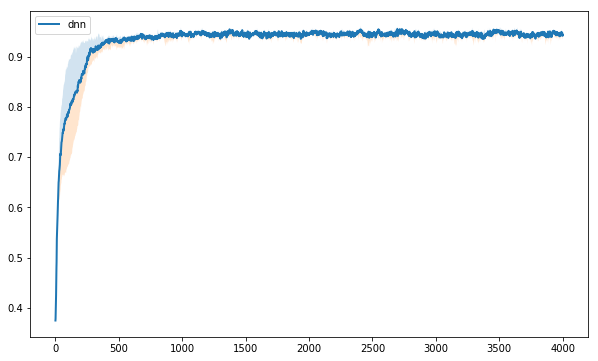

In [39]:
print("Tripod 3DOF")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(neat_33_fld,3,"neat",9,4001,"dnn",ax1)
plt.legend()
plt.show()

Plot of number of neurons and connections in DNN
legged_robot_novelty_neat_three_legs_3dof_long_eval_12_8_20-41-58
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_8_23-33-52
legged_robot_novelty_neat_three_legs_3dof_long_eval_16_8_7-1-9
legged_robot_novelty_neat_three_legs_3dof_long_eval_15_8_4-8-12
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_8_10-14-51
legged_robot_novelty_neat_three_legs_3dof_long_eval_15_8_17-11-25
legged_robot_novelty_neat_three_legs_3dof_long_eval_14_8_13-39-13
legged_robot_novelty_neat_three_legs_3dof_long_eval_12_8_7-47-15
legged_robot_novelty_neat_three_legs_3dof_long_eval_16_8_21-10-56


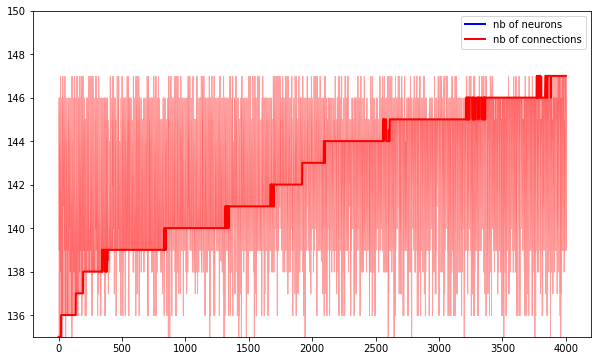

legged_robot_novelty_neat_three_legs_3dof_long_eval_12_8_20-41-58
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_8_23-33-52
legged_robot_novelty_neat_three_legs_3dof_long_eval_16_8_7-1-9
legged_robot_novelty_neat_three_legs_3dof_long_eval_15_8_4-8-12
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_8_10-14-51
legged_robot_novelty_neat_three_legs_3dof_long_eval_15_8_17-11-25
legged_robot_novelty_neat_three_legs_3dof_long_eval_14_8_13-39-13
legged_robot_novelty_neat_three_legs_3dof_long_eval_12_8_7-47-15
legged_robot_novelty_neat_three_legs_3dof_long_eval_16_8_21-10-56


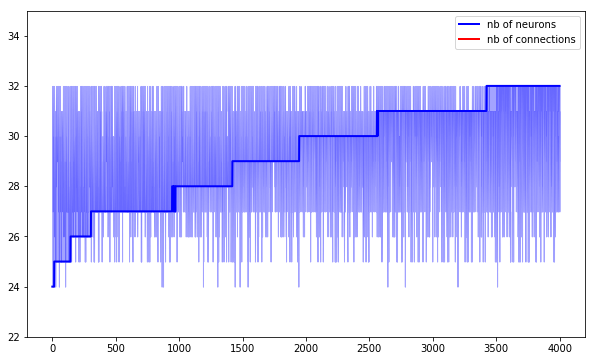

In [43]:
print("Plot of number of neurons and connections in DNN")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
ax1.set_ylim([135,150])
plot_dnn_data_from(neat_33_fld,3,"neat",4001,400,ax1)
plt.legend()
plt.show()
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
ax1.set_ylim([22,35])
plot_dnn_data_from(neat_33_fld,3,"neat",4001,400,ax1)
plt.legend()
plt.show()

nb points: 400 min=(-4.89, -4.94) max=(4.88,4.95)


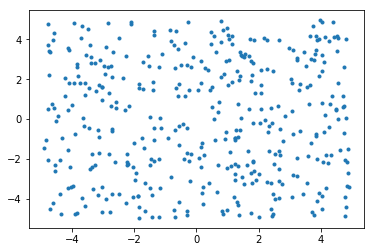

nb points: 400 min=(-4.94, -4.94) max=(4.95,4.92)


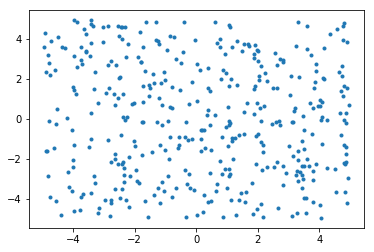

nb points: 400 min=(-4.95, -4.24) max=(4.77,4.93)


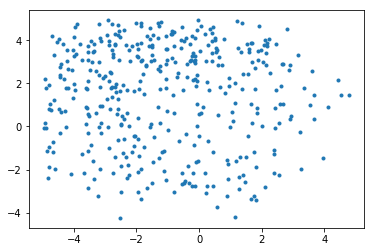

nb points: 400 min=(-4.92, -4.94) max=(4.92,4.92)


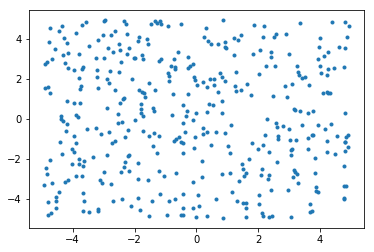

nb points: 400 min=(-4.94, -4.89) max=(4.93,4.88)


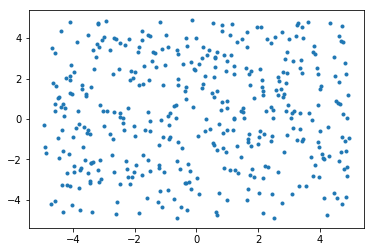

nb points: 400 min=(-4.85, -4.79) max=(4.92,4.89)


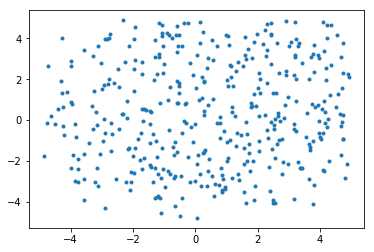

nb points: 400 min=(-4.87, -4.84) max=(4.87,4.90)


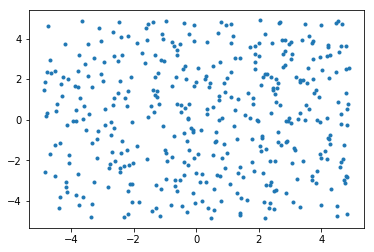

nb points: 400 min=(-4.93, -4.92) max=(4.91,4.91)


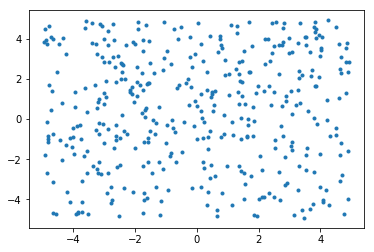

nb points: 400 min=(-4.91, -4.89) max=(4.92,4.91)


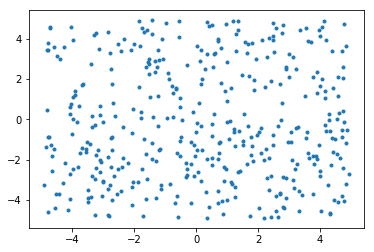

In [50]:
for folder in os.listdir(neat_33_fld) :
    plot_map(neat_33_fld + '/' + folder + '/bd_004000.log' ,3)

In [41]:
neat_32_fld = "/media/leni/Data/Experiment_Logs/second_run_neat_32/"

Tripod 2DOF


FileNotFoundError: [Errno 2] No such file or directory: '/media/leni/Data/Experiments_Logs/first_run_neat_32/'

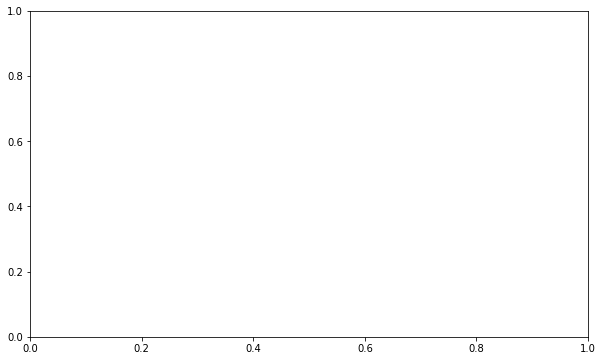

In [37]:
print("Tripod 2DOF")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(neat_32_fld,3,"neat",9,4001,"dnn",ax1)
plt.legend()
plt.show()

Plot of number of neurons and connections in DNN


FileNotFoundError: [Errno 2] No such file or directory: '/media/leni/Data/Experiment_Logs/first_run_neat_32/'

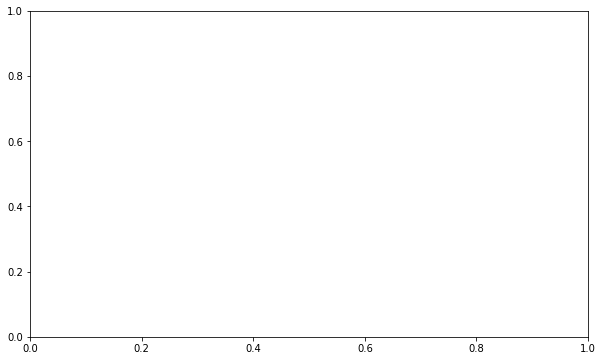

In [40]:
print("Plot of number of neurons and connections in DNN")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
#ax1.set_ylim([80,150])
plot_dnn_data_from(neat_32_fld,3,"neat",4001,400,ax1)
plt.legend()
plt.show()
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
ax1.set_ylim([15,30])
plot_dnn_data_from(neat_32_fld,3,"neat",4001,400,ax1)
plt.legend()
plt.show()

nb points: 400 min=(-4.94, -4.92) max=(4.93,4.92)


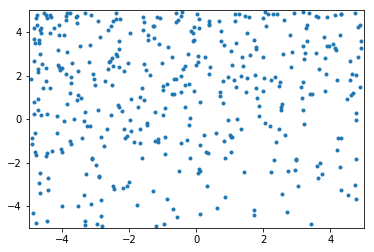

nb points: 400 min=(-0.43, -0.48) max=(0.54,0.42)


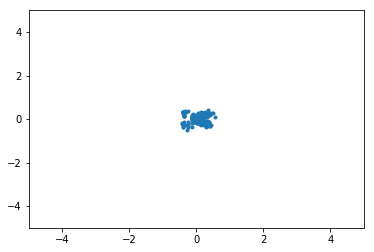

nb points: 400 min=(-0.36, -0.34) max=(0.46,0.46)


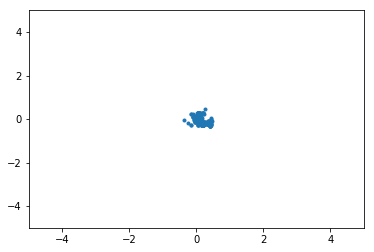

nb points: 400 min=(-0.49, -0.62) max=(0.50,0.43)


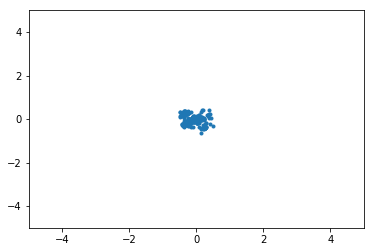

nb points: 400 min=(-0.52, -0.48) max=(0.35,0.34)


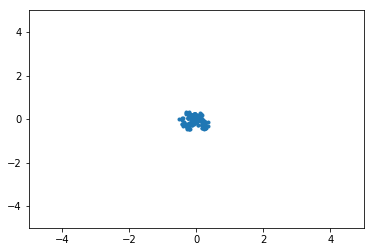

nb points: 400 min=(-0.44, -0.43) max=(0.59,0.49)


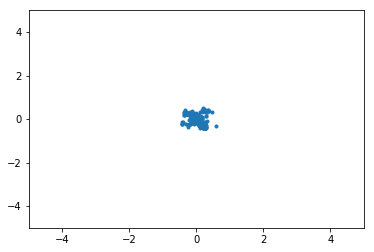

nb points: 400 min=(-0.48, -0.40) max=(0.57,0.33)


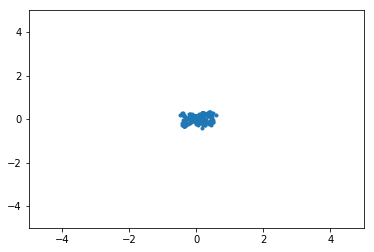

In [12]:
for folder in os.listdir(neat_32_fld) :
    plot_map(neat_32_fld + '/' + folder + '/bd_004000.log' ,3)

In [42]:
neat_34_fld = "/media/leni/Data/Experiment_Logs/neat_34/"

Tripod 4DOF
legged_robot_novelty_neat_three_legs_4dof_long_eval_28_8_19-9-3
legged_robot_novelty_neat_three_legs_4dof_long_eval_26_8_11-19-50
legged_robot_novelty_neat_three_legs_4dof_long_eval_27_8_5-52-19
legged_robot_novelty_neat_three_legs_4dof_long_eval_28_8_0-1-19
legged_robot_novelty_neat_three_legs_4dof_long_eval_30_8_9-40-33
legged_robot_novelty_neat_three_legs_4dof_long_eval_25_8_16-47-25
legged_robot_novelty_neat_three_legs_4dof_long_eval_24_8_20-18-32
legged_robot_novelty_neat_three_legs_4dof_long_eval_1_9_3-9-30
legged_robot_novelty_neat_three_legs_4dof_long_eval_29_8_16-6-18
legged_robot_novelty_neat_three_legs_4dof_long_eval_1_9_22-37-54


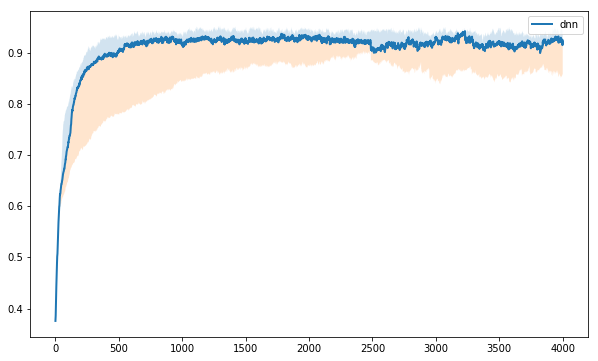

In [9]:
print("Tripod 4DOF")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(neat_34_fld,3,"neat",10,4001,"dnn",ax1)
plt.legend()
plt.show()

Plot of number of neurons and connections in DNN
legged_robot_novelty_neat_three_legs_4dof_long_eval_1_9_22-37-54
legged_robot_novelty_neat_three_legs_4dof_long_eval_1_9_3-9-30
legged_robot_novelty_neat_three_legs_4dof_long_eval_24_8_20-18-32
legged_robot_novelty_neat_three_legs_4dof_long_eval_25_8_16-47-25
legged_robot_novelty_neat_three_legs_4dof_long_eval_26_8_11-19-50
legged_robot_novelty_neat_three_legs_4dof_long_eval_27_8_5-52-19
legged_robot_novelty_neat_three_legs_4dof_long_eval_28_8_0-1-19
legged_robot_novelty_neat_three_legs_4dof_long_eval_28_8_19-9-3
legged_robot_novelty_neat_three_legs_4dof_long_eval_29_8_16-6-18
legged_robot_novelty_neat_three_legs_4dof_long_eval_30_8_9-40-33


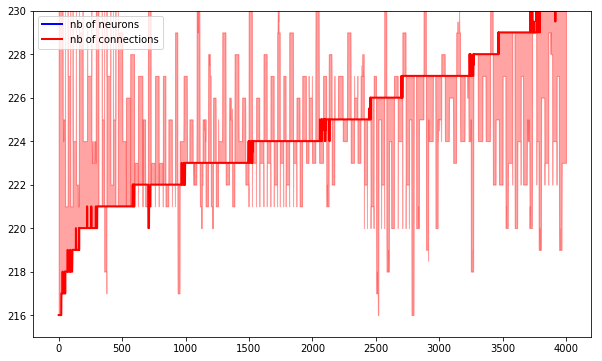

legged_robot_novelty_neat_three_legs_4dof_long_eval_1_9_22-37-54
legged_robot_novelty_neat_three_legs_4dof_long_eval_1_9_3-9-30
legged_robot_novelty_neat_three_legs_4dof_long_eval_24_8_20-18-32
legged_robot_novelty_neat_three_legs_4dof_long_eval_25_8_16-47-25
legged_robot_novelty_neat_three_legs_4dof_long_eval_26_8_11-19-50
legged_robot_novelty_neat_three_legs_4dof_long_eval_27_8_5-52-19
legged_robot_novelty_neat_three_legs_4dof_long_eval_28_8_0-1-19
legged_robot_novelty_neat_three_legs_4dof_long_eval_28_8_19-9-3
legged_robot_novelty_neat_three_legs_4dof_long_eval_29_8_16-6-18
legged_robot_novelty_neat_three_legs_4dof_long_eval_30_8_9-40-33


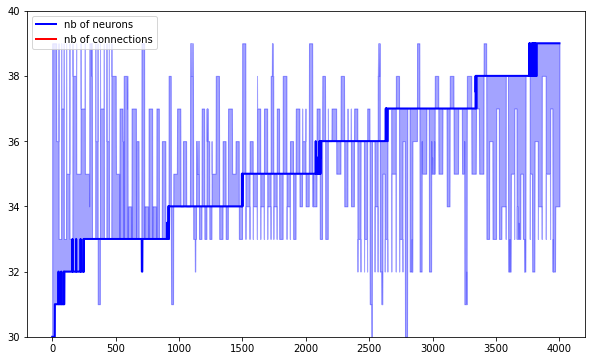

In [44]:
print("Plot of number of neurons and connections in DNN")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
ax1.set_ylim([215,230])
plot_dnn_data_from(neat_34_fld,3,"neat",4001,400,ax1)
plt.legend()
plt.show()
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
ax1.set_ylim([30,40])
plot_dnn_data_from(neat_34_fld,3,"neat",4001,400,ax1)
plt.legend()
plt.show()

nb points: 400 min=(-0.73, -0.52) max=(0.48,0.35)


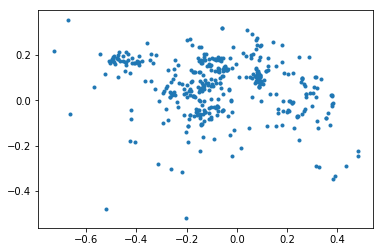

nb points: 400 min=(-4.88, -4.24) max=(4.33,4.73)


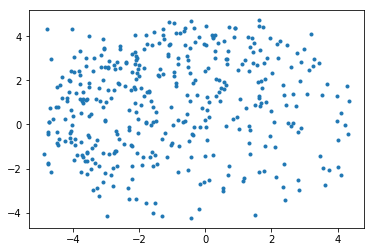

nb points: 400 min=(-4.88, -4.95) max=(4.91,4.95)


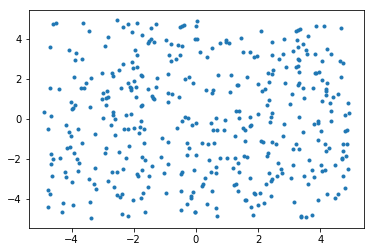

nb points: 400 min=(-4.53, -4.81) max=(4.62,4.70)


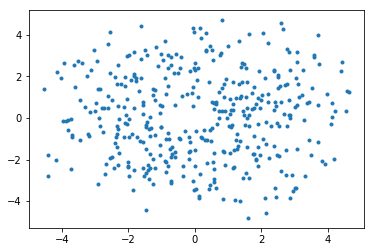

nb points: 400 min=(-4.89, -4.86) max=(4.95,4.93)


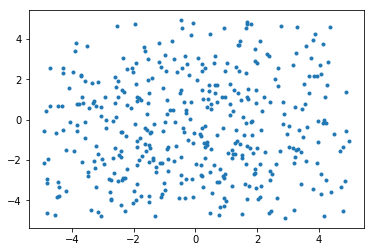

nb points: 400 min=(-4.88, -4.86) max=(4.87,4.87)


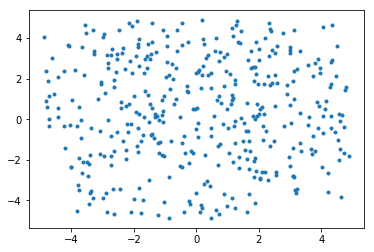

nb points: 400 min=(-4.87, -4.92) max=(4.92,4.92)


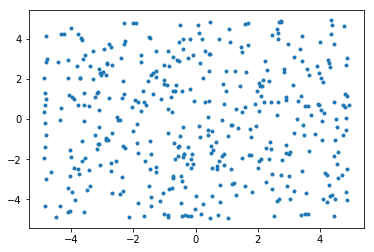

nb points: 400 min=(-4.84, -4.83) max=(4.91,4.88)


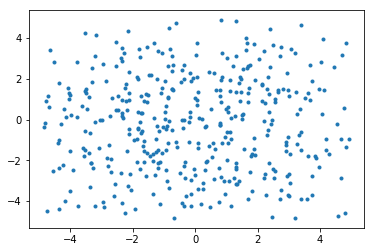

nb points: 400 min=(-4.95, -4.92) max=(4.91,4.93)


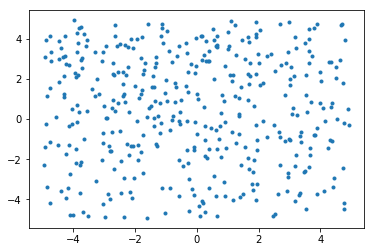

nb points: 400 min=(-4.90, -4.19) max=(4.76,4.68)


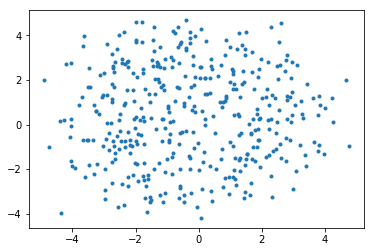

In [13]:
for folder in os.listdir(neat_34_fld) :
    plot_map(neat_34_fld + '/' + folder + '/bd_004000.log' ,3)

In [5]:
neat_32_fld = "/home/leni/sferes_log/legged_robot_exp/second_run_neat_32/"

Tripod 2DOF
legged_robot_novelty_neat_three_legs_2dof_long_eval_10_9_5-57-23
legged_robot_novelty_neat_three_legs_2dof_long_eval_11_9_3-36-9
legged_robot_novelty_neat_three_legs_2dof_long_eval_9_9_20-47-29
legged_robot_novelty_neat_three_legs_2dof_long_eval_11_9_21-21-20
legged_robot_novelty_neat_three_legs_2dof_long_eval_10_9_16-42-31
legged_robot_novelty_neat_three_legs_2dof_long_eval_9_9_2-8-18
legged_robot_novelty_neat_three_legs_2dof_long_eval_8_9_15-58-57
legged_robot_novelty_neat_three_legs_2dof_long_eval_11_9_11-12-22
legged_robot_novelty_neat_three_legs_2dof_long_eval_9_9_11-37-27
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_9_7-49-44


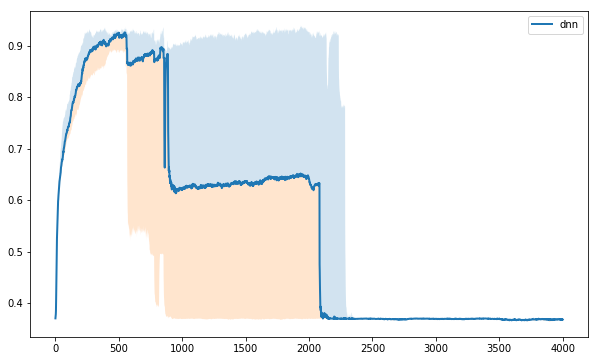

In [18]:
print("Tripod 2DOF")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(neat_32_fld,3,"neat",10,4001,"dnn",ax1)
plt.legend()
plt.show()

Plot of number of neurons and connections in DNN
legged_robot_novelty_neat_three_legs_2dof_long_eval_10_9_5-57-23
legged_robot_novelty_neat_three_legs_2dof_long_eval_11_9_3-36-9
legged_robot_novelty_neat_three_legs_2dof_long_eval_9_9_20-47-29
legged_robot_novelty_neat_three_legs_2dof_long_eval_11_9_21-21-20
legged_robot_novelty_neat_three_legs_2dof_long_eval_10_9_16-42-31
legged_robot_novelty_neat_three_legs_2dof_long_eval_9_9_2-8-18
legged_robot_novelty_neat_three_legs_2dof_long_eval_8_9_15-58-57
legged_robot_novelty_neat_three_legs_2dof_long_eval_11_9_11-12-22
legged_robot_novelty_neat_three_legs_2dof_long_eval_9_9_11-37-27
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_9_7-49-44


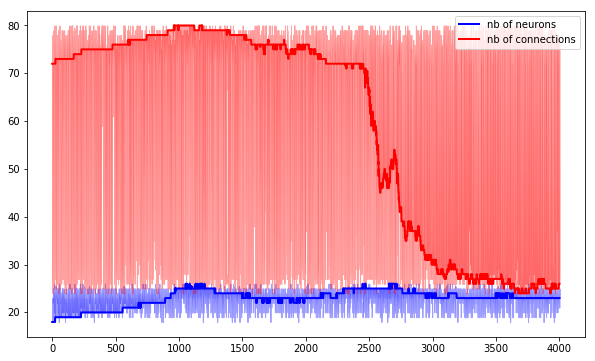

legged_robot_novelty_neat_three_legs_2dof_long_eval_10_9_5-57-23
legged_robot_novelty_neat_three_legs_2dof_long_eval_11_9_3-36-9
legged_robot_novelty_neat_three_legs_2dof_long_eval_9_9_20-47-29
legged_robot_novelty_neat_three_legs_2dof_long_eval_11_9_21-21-20
legged_robot_novelty_neat_three_legs_2dof_long_eval_10_9_16-42-31
legged_robot_novelty_neat_three_legs_2dof_long_eval_9_9_2-8-18
legged_robot_novelty_neat_three_legs_2dof_long_eval_8_9_15-58-57
legged_robot_novelty_neat_three_legs_2dof_long_eval_11_9_11-12-22
legged_robot_novelty_neat_three_legs_2dof_long_eval_9_9_11-37-27
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_9_7-49-44


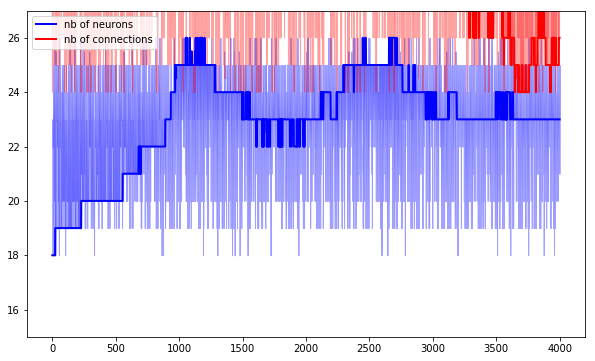

In [20]:
print("Plot of number of neurons and connections in DNN")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
#ax1.set_ylim([80,150])
plot_dnn_data_from(neat_32_fld,3,"neat",4001,400,ax1)
plt.legend()
plt.show()
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
ax1.set_ylim([15,27])
plot_dnn_data_from(neat_32_fld,3,"neat",4001,400,ax1)
plt.legend()
plt.show()

nb points: 400 min=(-0.51, -0.40) max=(0.53,0.38)


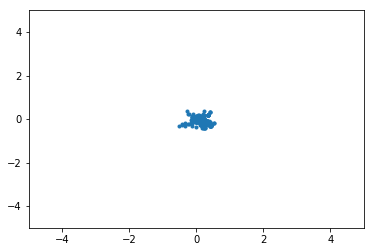

nb points: 400 min=(-4.89, -4.90) max=(4.95,4.86)


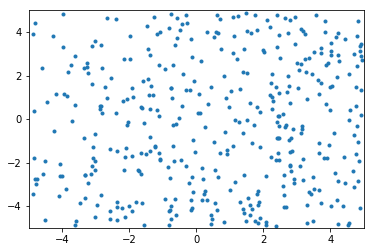

nb points: 400 min=(-4.92, -4.94) max=(4.95,4.93)


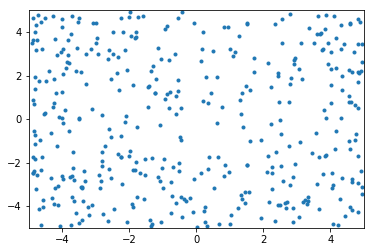

nb points: 400 min=(-0.39, -0.40) max=(0.57,0.46)


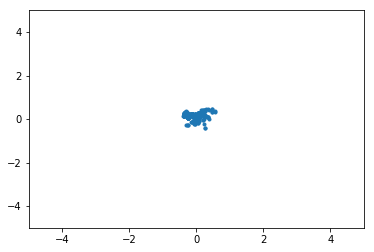

nb points: 400 min=(-0.42, -0.46) max=(0.48,0.27)


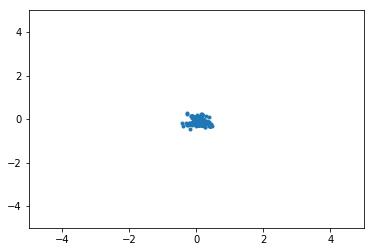

nb points: 400 min=(-0.50, -0.46) max=(0.58,0.43)


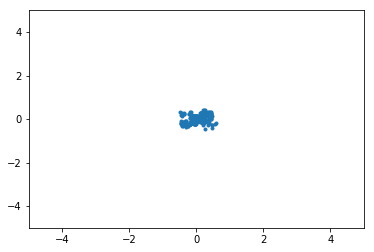

nb points: 400 min=(-0.41, -0.34) max=(0.41,0.46)


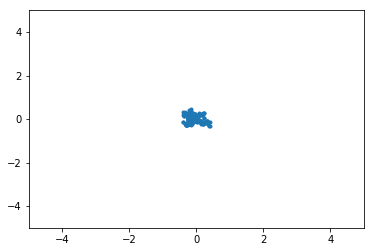

nb points: 400 min=(-0.39, -0.49) max=(0.49,0.40)


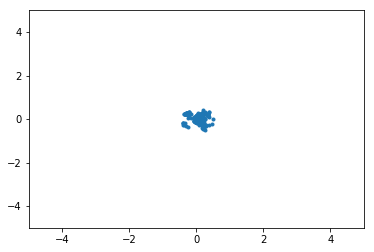

nb points: 400 min=(-0.54, -0.41) max=(0.52,0.47)


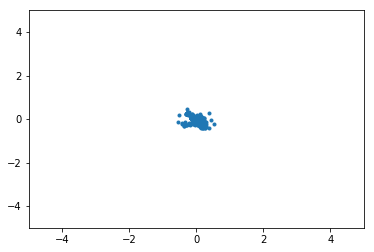

nb points: 400 min=(-0.35, -0.49) max=(0.45,0.34)


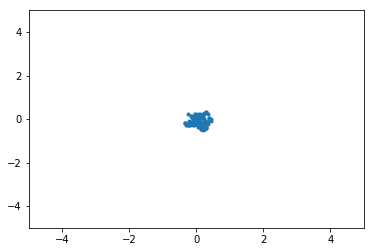

In [21]:
for folder in os.listdir(neat_32_fld) :
    plot_map(neat_32_fld + '/' + folder + '/bd_004000.log' ,3)

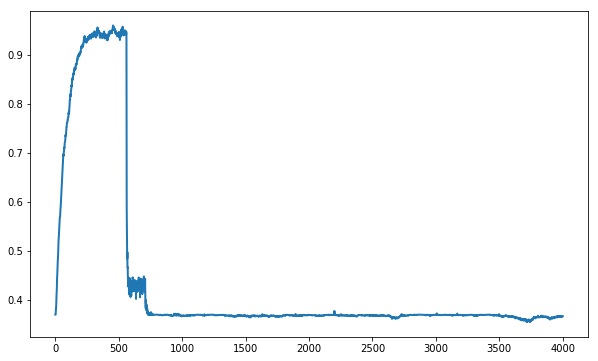

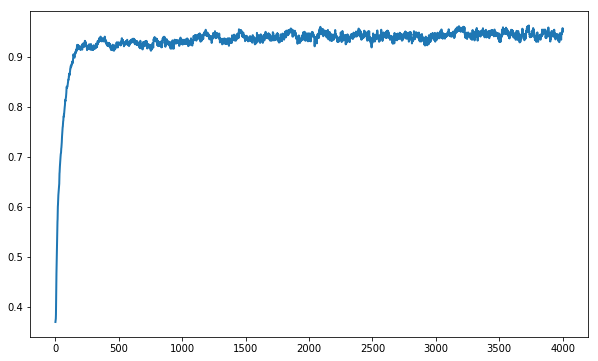

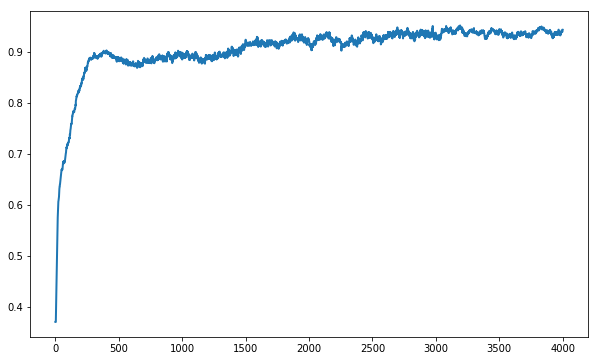

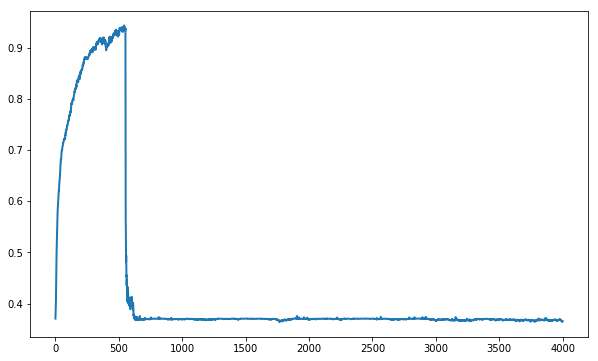

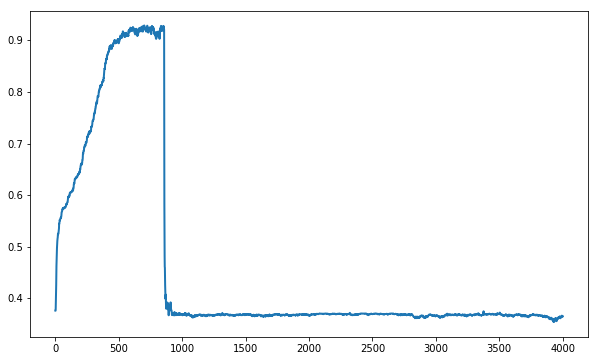

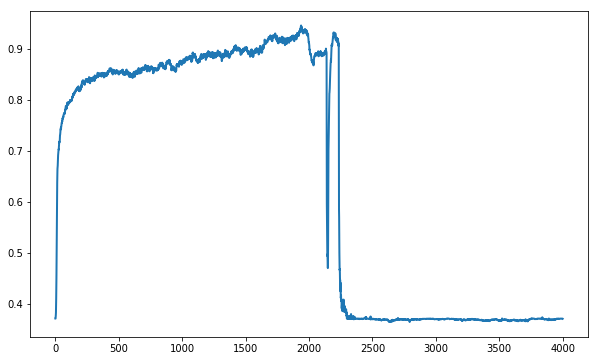

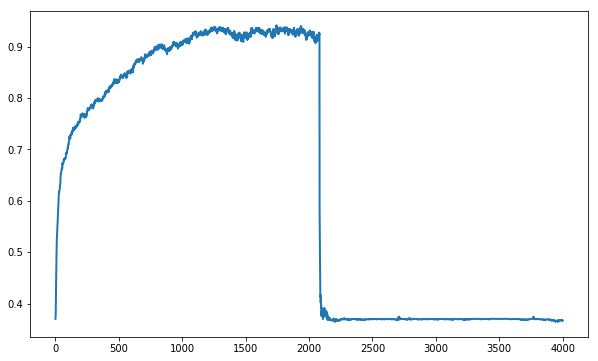

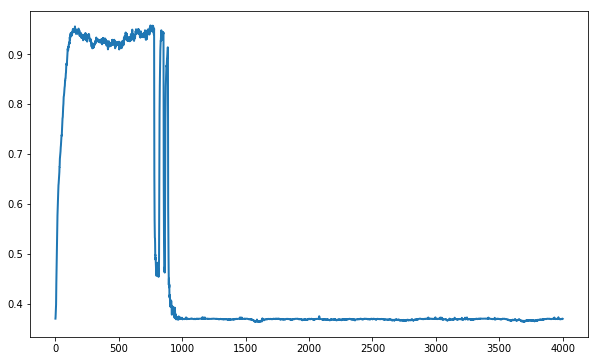

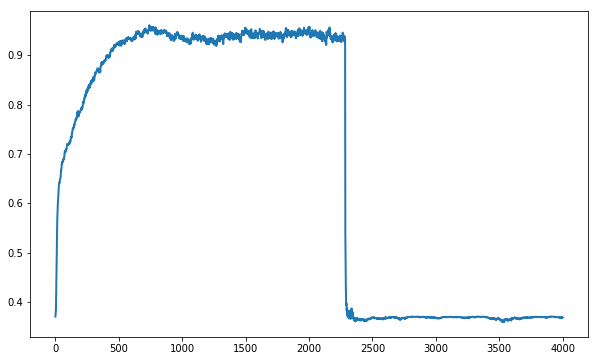

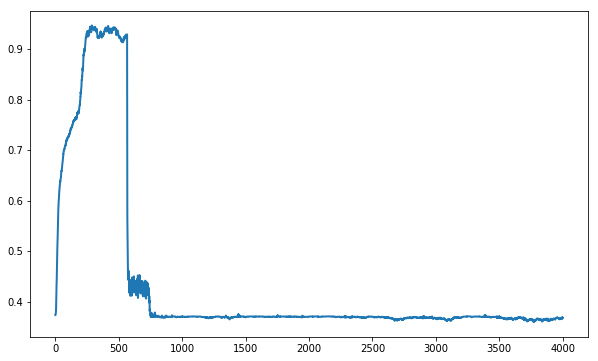

In [13]:
for folder in os.listdir(neat_32_fld) :
    if folder.split('_')[0] != "legged" :
        continue
    if folder.split('_')[3] == "neat" :
        fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
        plot_single_run_jsd(neat_32_fld,folder,ax1)

In [11]:
rnn_16_32 = "/home/leni/sferes_log/legged_robot_exp/rnn_16_32/"

Tripod 2DOF RNN 16
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_25_9_13-15-6
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_25_9_13-15-7
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_28_9_16-56-23-3604
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_28_9_16-56-22-2449
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_28_9_16-56-23-3721
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_28_9_16-56-24-4638
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_25_9_13-15-8
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_28_9_16-56-24-4985
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_28_9_16-56-22-2450
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_28_9_16-56-23-3753
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_28_9_16-56-23-3682
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_28_9_16-56-24-4582
leg

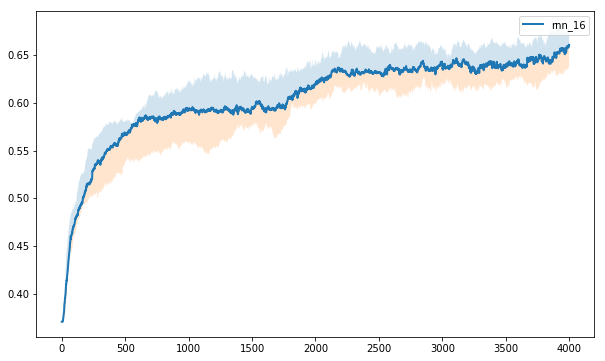

In [13]:
print("Tripod 2DOF RNN 16")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(rnn_16_32,3,"rnn",14,4001,"rnn_16",ax1)
plt.legend()
plt.show()

nb points: 400 min=(-3.17, -2.94) max=(3.08,3.21)


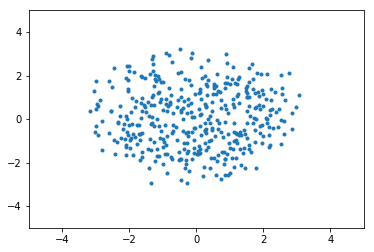

nb points: 400 min=(-2.62, -2.72) max=(3.03,2.95)


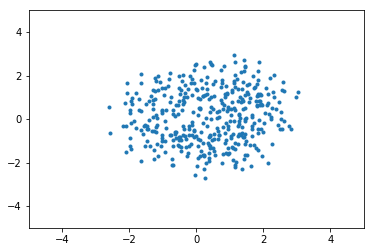

nb points: 400 min=(-3.04, -2.87) max=(2.74,3.10)


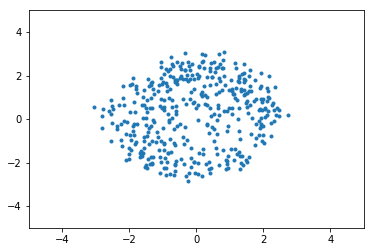

nb points: 400 min=(-3.07, -3.11) max=(3.38,3.43)


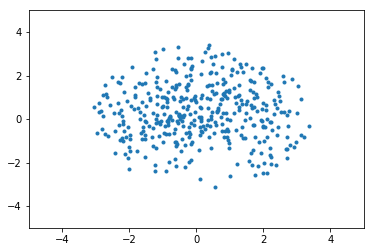

nb points: 400 min=(-2.93, -3.11) max=(3.30,2.54)


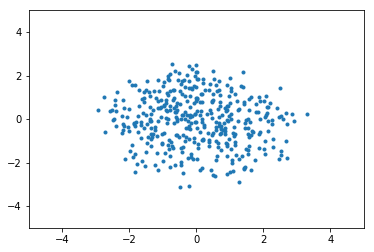

nb points: 400 min=(-3.37, -2.75) max=(3.52,3.27)


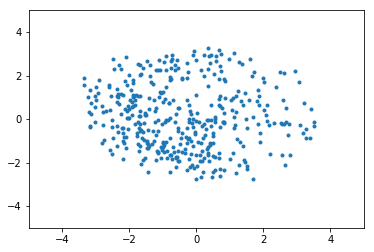

nb points: 400 min=(-2.91, -3.53) max=(3.79,2.80)


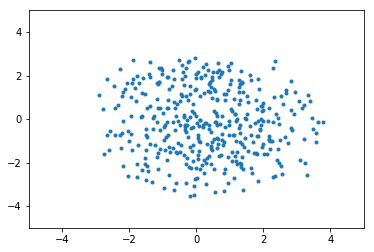

nb points: 400 min=(-3.20, -3.10) max=(3.52,3.55)


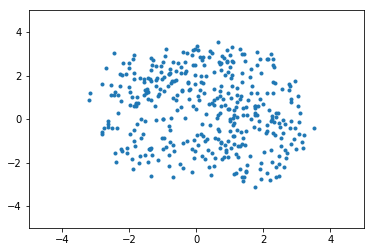

nb points: 400 min=(-2.88, -2.53) max=(3.06,3.12)


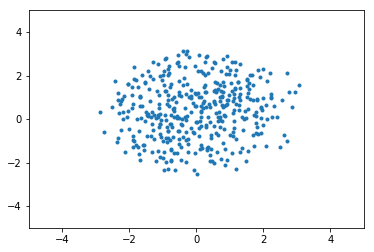

nb points: 400 min=(-2.85, -2.81) max=(3.10,2.97)


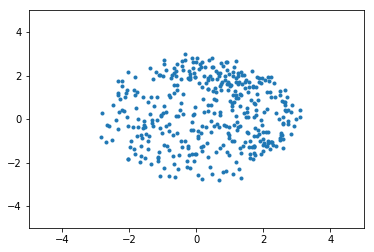

nb points: 400 min=(-3.29, -2.82) max=(3.40,2.48)


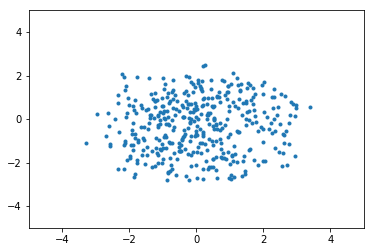

nb points: 400 min=(-2.56, -2.19) max=(3.16,2.84)


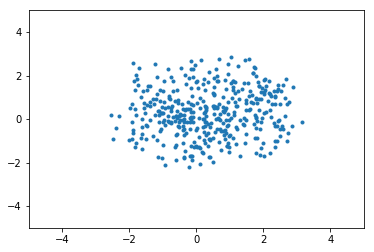

nb points: 400 min=(-3.49, -3.54) max=(3.03,2.64)


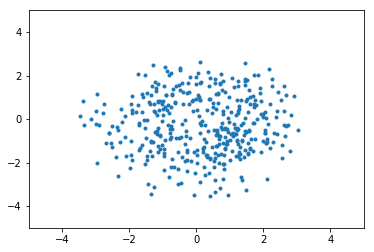

nb points: 400 min=(-3.03, -2.38) max=(2.77,2.90)


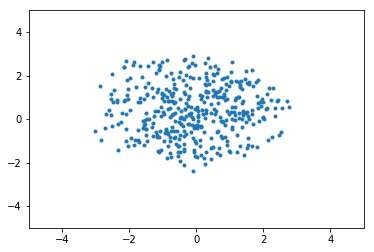

In [14]:
for folder in os.listdir(rnn_16_32) :
    plot_map(rnn_16_32 + '/' + folder + '/bd_004000.log' ,3)

In [6]:
rnn_32_32 = "/home/leni/sferes_log/legged_robot_exp/rnn_32_32/"

Tripod 2DOF RNN 32
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_30_9_13-42-34-5000
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_30_9_13-42-34-4992
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_30_9_13-42-34-4972
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_30_9_13-42-34-4971
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_30_9_13-42-35-5011
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_30_9_13-42-35-5003
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_30_9_13-42-34-4967
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_30_9_13-42-34-4990
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_30_9_13-42-35-5008
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_30_9_13-42-34-4988


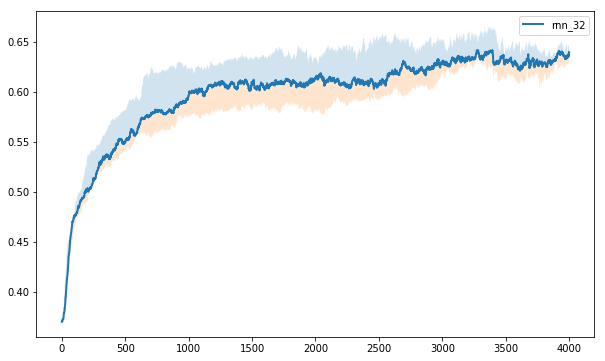

In [8]:
print("Tripod 2DOF RNN 32")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(rnn_32_32,3,"rnn",10,4001,"rnn_32",ax1)
plt.legend()
plt.show()

nb points: 400 min=(-2.94, -2.82) max=(2.87,2.83)


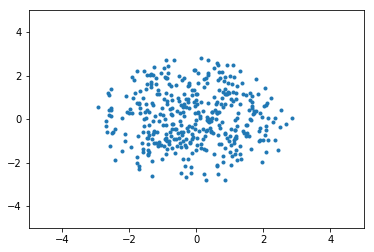

nb points: 400 min=(-2.99, -2.62) max=(3.33,3.48)


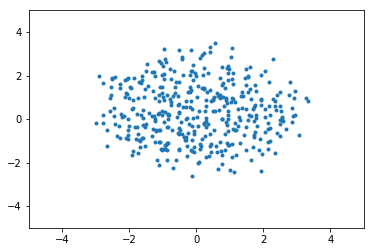

nb points: 400 min=(-2.70, -2.80) max=(3.01,2.84)


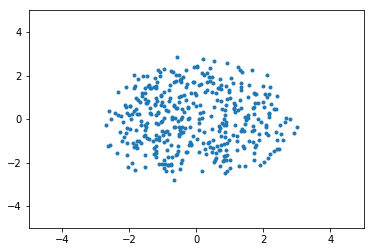

nb points: 400 min=(-2.84, -2.75) max=(2.61,2.61)


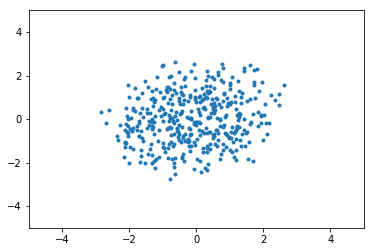

nb points: 400 min=(-3.19, -2.65) max=(3.36,3.15)


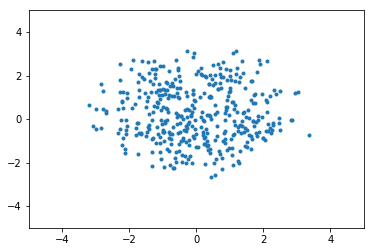

nb points: 400 min=(-3.39, -3.02) max=(3.14,3.23)


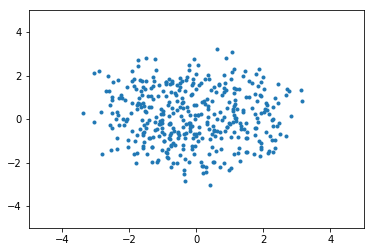

nb points: 400 min=(-3.28, -2.54) max=(2.98,3.16)


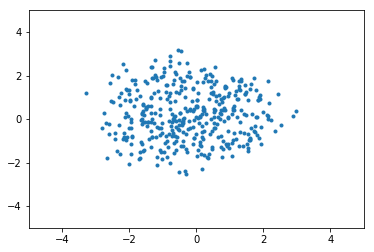

nb points: 400 min=(-3.01, -2.61) max=(3.16,3.04)


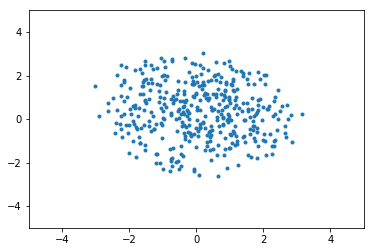

nb points: 400 min=(-2.25, -2.71) max=(2.91,2.85)


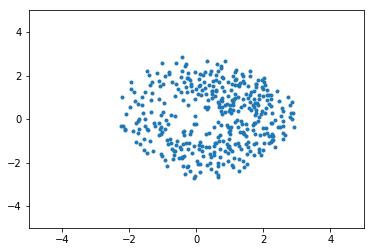

nb points: 400 min=(-3.00, -2.60) max=(2.54,3.05)


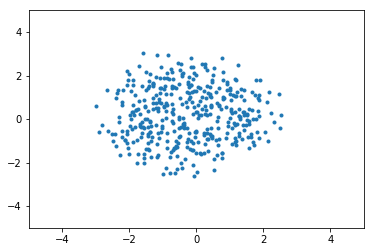

In [10]:
for folder in os.listdir(rnn_32_32) :
    plot_map(rnn_32_32 + '/' + folder + '/bd_004000.log' ,3)

In [11]:
rnn_64_32 = "/home/leni/sferes_log/legged_robot_exp/rnn_64_32/"

Tripod 2DOF RNN 64
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_64_long_eval_30_9_13-43-33-3125
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_64_long_eval_30_9_13-43-33-3119
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_64_long_eval_30_9_13-43-35-5663
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_64_long_eval_30_9_13-43-34-4295
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_64_long_eval_30_9_13-43-34-4290
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_64_long_eval_30_9_13-43-35-5670
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_64_long_eval_30_9_13-43-34-4142
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_64_long_eval_30_9_13-43-34-4145
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_64_long_eval_30_9_13-43-35-5414
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_64_long_eval_30_9_13-43-35-5442


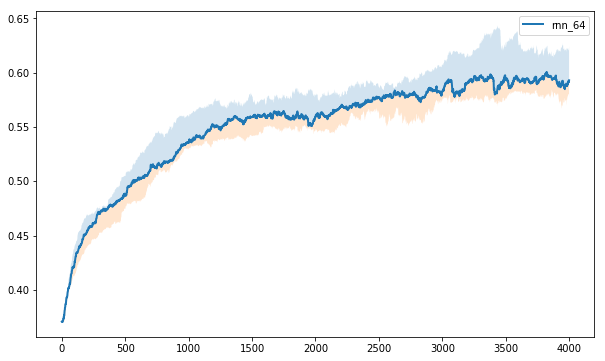

In [12]:
print("Tripod 2DOF RNN 64")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(rnn_64_32,3,"rnn",10,4001,"rnn_64",ax1)
plt.legend()
plt.show()

nb points: 400 min=(-2.63, -2.24) max=(2.77,2.66)


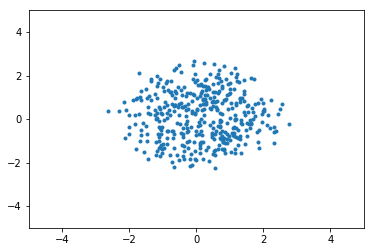

nb points: 400 min=(-3.18, -3.58) max=(3.69,2.85)


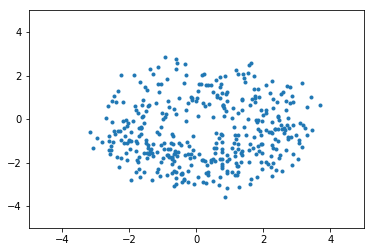

nb points: 400 min=(-3.05, -2.90) max=(2.76,2.89)


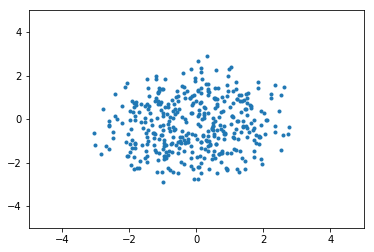

nb points: 400 min=(-2.14, -2.08) max=(2.71,2.21)


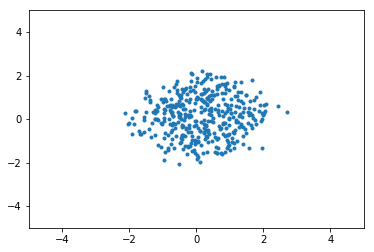

nb points: 400 min=(-2.77, -2.80) max=(3.79,3.50)


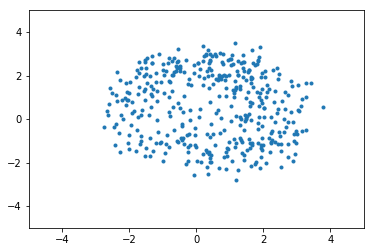

nb points: 400 min=(-1.96, -2.88) max=(3.56,2.49)


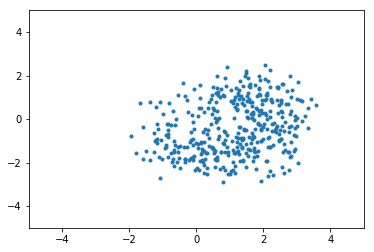

nb points: 400 min=(-2.45, -3.09) max=(2.67,2.48)


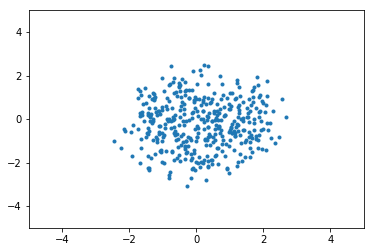

nb points: 400 min=(-2.57, -2.53) max=(2.48,2.09)


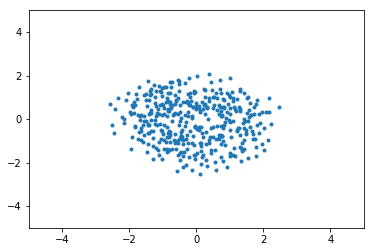

nb points: 400 min=(-2.10, -2.09) max=(2.10,1.82)


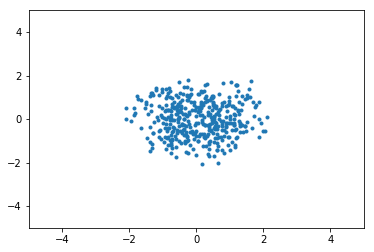

nb points: 400 min=(-2.51, -1.94) max=(2.46,2.52)


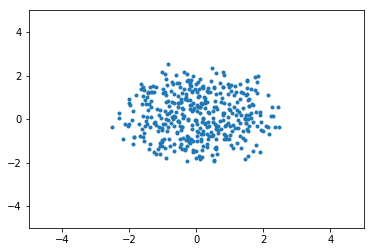

In [14]:
for folder in os.listdir(rnn_64_32) :
    plot_map(rnn_64_32 + '/' + folder + '/bd_004000.log' ,3)

In [9]:
rnn_16_32_long = "/home/leni/sferes_log/legged_robot_exp/rnn_16_32_long/"

Tripod 2DOF RNN 16 LONG RUN
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_long_run_30_9_13-47-18-8405
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_long_run_30_9_13-47-19-9577
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_long_run_30_9_13-47-19-9726
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_long_run_30_9_13-47-20-759
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_long_run_30_9_13-47-19-9569
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_long_run_30_9_13-47-21-1015
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_long_run_30_9_13-47-18-8415
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_long_run_30_9_13-47-20-710
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_long_run_30_9_13-47-19-9721
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_long_run_30_9_13-47-21-1021


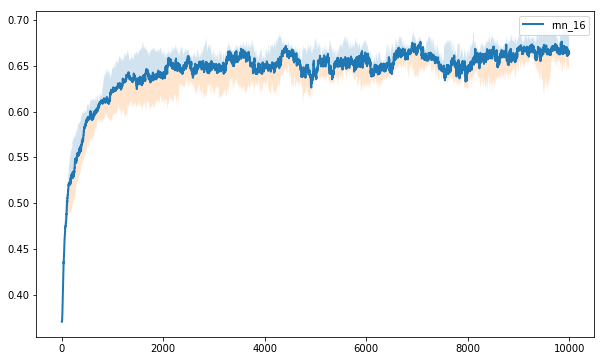

In [11]:
print("Tripod 2DOF RNN 16 LONG RUN")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(rnn_16_32_long,3,"rnn",10,10001,"rnn_16",ax1)
plt.legend()
plt.show()

nb points: 400 min=(-3.38, -2.42) max=(3.41,3.51)


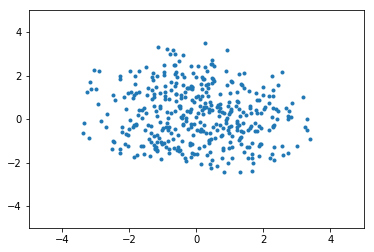

nb points: 400 min=(-3.69, -3.73) max=(3.32,3.17)


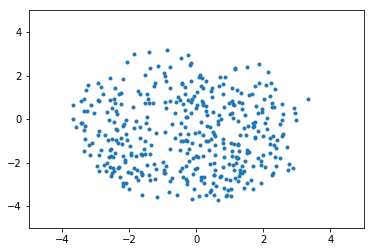

nb points: 400 min=(-3.14, -2.79) max=(3.22,3.71)


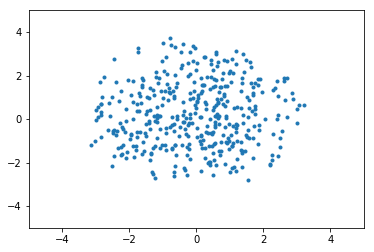

nb points: 400 min=(-3.49, -3.37) max=(3.53,3.12)


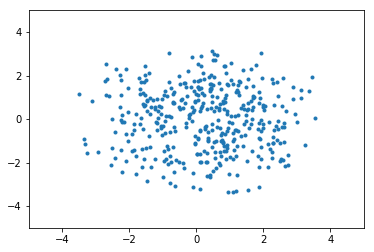

nb points: 400 min=(-3.05, -2.86) max=(3.35,3.43)


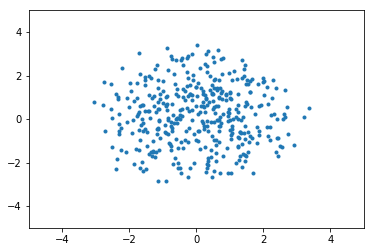

nb points: 400 min=(-3.10, -2.02) max=(3.22,3.27)


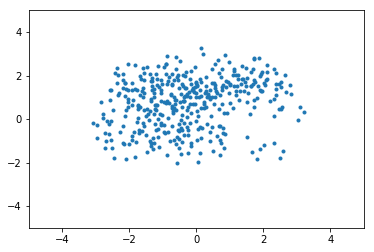

nb points: 400 min=(-3.22, -3.15) max=(3.18,3.14)


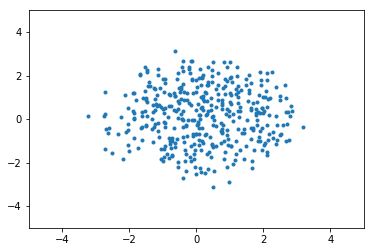

nb points: 400 min=(-3.04, -2.99) max=(3.12,3.02)


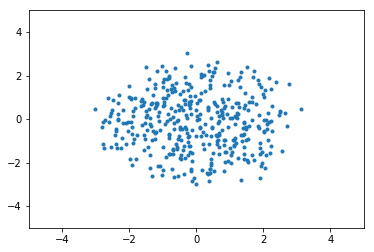

nb points: 400 min=(-3.17, -2.78) max=(3.05,3.17)


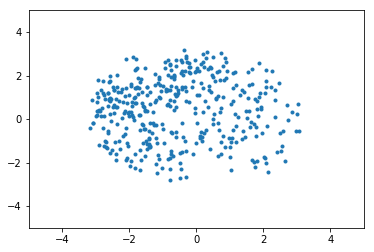

nb points: 400 min=(-2.31, -2.45) max=(2.51,2.64)


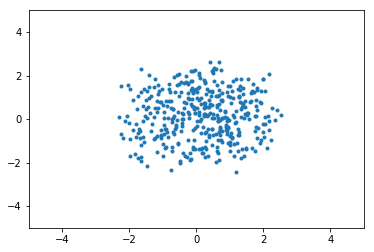

In [14]:
for folder in os.listdir(rnn_16_32_long) :
    plot_map(rnn_16_32_long + '/' + folder + '/bd_010000.log' ,3)

In [32]:
neat_32_eval_all = "/home/leni/sferes_log/legged_robot_exp/neat_32_eval_all-2/"

Tripod 2DOF DNN EVAL ALL
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3054
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-52-2980
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-52-2978
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3148
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3118
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3072
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3129
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3126
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3069
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3215


/usr/lib/python3/dist-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


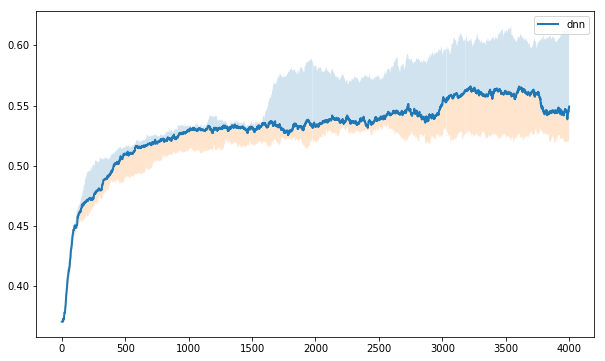

In [7]:
print("Tripod 2DOF DNN EVAL ALL")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(neat_32_eval_all,3,"neat",10,4001,"dnn",ax1)
plt.legend()
plt.show()

Plot of number of neurons and connections in DNN
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3054
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-52-2980
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-52-2978
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3148
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3118
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3072
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3129
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3126
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3069
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3215


legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3054
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-52-2980
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-52-2978
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3148
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3118
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3072
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3129
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3126
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3069
legged_robot_novelty_neat_three_legs_2dof_long_eval_ea_eval_all_2_0_12-58-53-3215


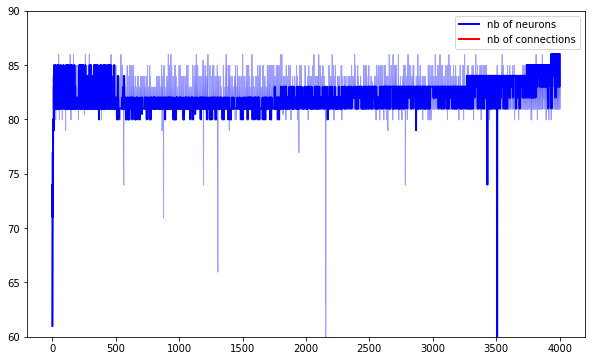

In [54]:
print("Plot of number of neurons and connections in DNN")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
ax1.set_ylim([2000,5100])
plot_dnn_data_from(neat_32_eval_all,3,"neat",4001,400,ax1)
plt.legend()
plt.show()
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
ax1.set_ylim([60,90])
plot_dnn_data_from(neat_32_eval_all,3,"neat",4001,400,ax1)
plt.legend()
plt.show()

nb points: 400 min=(-3.15, -3.24) max=(3.08,2.97)


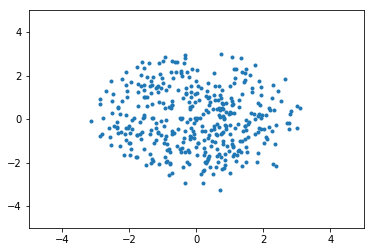

nb points: 400 min=(-2.00, -1.84) max=(2.14,2.09)


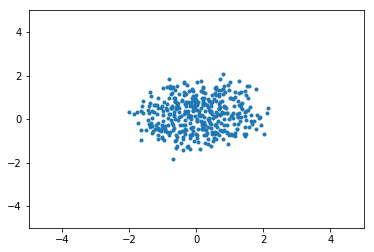

nb points: 400 min=(-1.90, -2.06) max=(2.49,2.12)


nb points: 400 min=(-2.25, -2.15) max=(2.43,2.32)


nb points: 400 min=(-1.31, -1.51) max=(1.60,1.73)


nb points: 400 min=(-2.59, -2.68) max=(3.13,2.52)


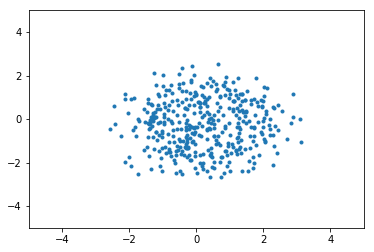

nb points: 400 min=(-1.78, -2.59) max=(2.33,2.23)


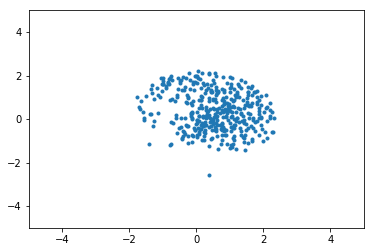

nb points: 400 min=(-3.06, -2.48) max=(3.46,2.86)


nb points: 400 min=(-2.85, -2.61) max=(2.59,2.44)


nb points: 400 min=(-1.94, -1.52) max=(2.31,2.23)


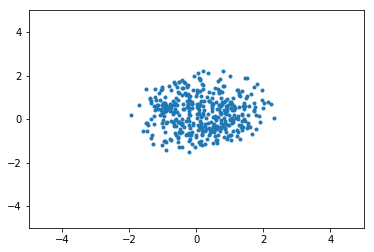

In [55]:
for folder in os.listdir(neat_32_eval_all) :
    plot_map(neat_32_eval_all + '/' + folder + '/bd_004000.log' ,3)

In [10]:
rnn_16_33 = "/home/leni/sferes_log/legged_robot_exp/rnn_16_33/" 

Tripod 3DOF RNN 16
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_16_long_eval_12_10_14-44-12-2688
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_16_long_eval_12_10_14-44-11-1270
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_16_long_eval_12_10_14-44-10-240
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_16_long_eval_12_10_14-44-12-2685
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_16_long_eval_12_10_14-44-11-1548
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_16_long_eval_12_10_14-44-10-201
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_16_long_eval_12_10_14-44-11-1549
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_16_long_eval_12_10_14-44-12-2382
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_16_long_eval_12_10_14-44-12-2390
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_16_long_eval_12_10_14-44-11-1210


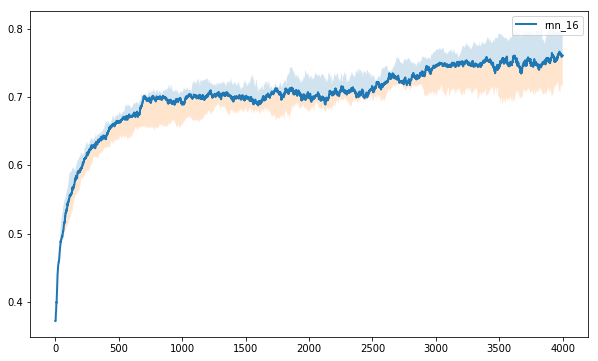

In [10]:
print("Tripod 3DOF RNN 16")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(rnn_16_33,3,"rnn",10,4001,"rnn_16",ax1)
plt.legend()
plt.show()

nb points: 400 min=(-4.92, -4.74) max=(4.66,4.78)


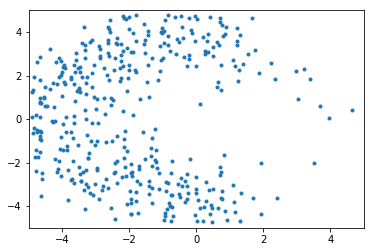

nb points: 400 min=(-3.91, -2.90) max=(3.96,3.78)


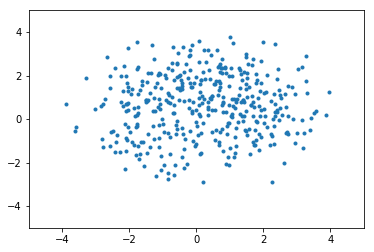

nb points: 400 min=(-3.60, -4.01) max=(3.99,3.89)


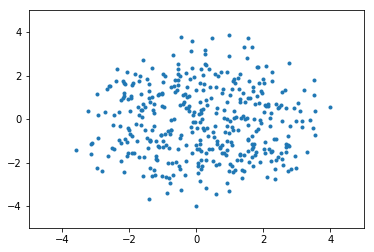

nb points: 400 min=(-3.27, -3.49) max=(3.55,4.14)


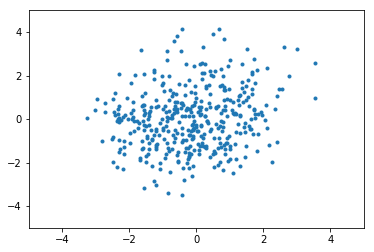

nb points: 400 min=(-4.59, -3.69) max=(4.21,4.72)


nb points: 400 min=(-3.58, -3.53) max=(3.02,3.81)


nb points: 400 min=(-4.32, -4.26) max=(3.68,4.11)


nb points: 400 min=(-4.48, -3.89) max=(4.44,4.52)


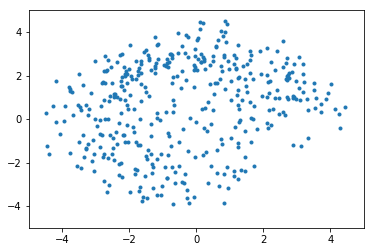

nb points: 400 min=(-4.69, -4.79) max=(4.84,4.90)


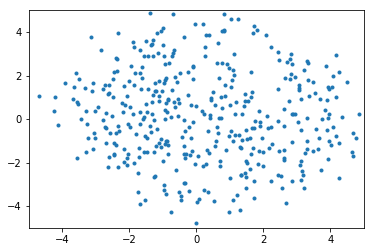

nb points: 400 min=(-3.00, -4.10) max=(4.57,3.92)


In [11]:
for folder in os.listdir(rnn_16_33) :
    plot_map(rnn_16_33 + '/' + folder + '/bd_004000.log' ,3)

In [7]:
rnn_16_34 = "/home/leni/sferes_log/legged_robot_exp/rnn_16_34/" 

In [15]:
print("Tripod 4DOF RNN 16")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(rnn_16_34,3,"rnn",10,4001,"rnn_16",ax1)
plt.legend()
plt.show()

Tripod 3DOF RNN 16
legged_robot_novelty_rnn_three_legs_4dof_nb_hidden_16_long_eval_12_10_14-44-29-9488
legged_robot_novelty_rnn_three_legs_4dof_nb_hidden_16_long_eval_12_10_14-44-27-7143
legged_robot_novelty_rnn_three_legs_4dof_nb_hidden_16_long_eval_12_10_14-44-28-8522
legged_robot_novelty_rnn_three_legs_4dof_nb_hidden_16_long_eval_12_10_14-44-27-7259
legged_robot_novelty_rnn_three_legs_4dof_nb_hidden_16_long_eval_12_10_14-44-29-9876
legged_robot_novelty_rnn_three_legs_4dof_nb_hidden_16_long_eval_12_10_14-44-28-8523
legged_robot_novelty_rnn_three_legs_4dof_nb_hidden_16_long_eval_12_10_14-44-28-8152
legged_robot_novelty_rnn_three_legs_4dof_nb_hidden_16_long_eval_12_10_14-44-29-9493
legged_robot_novelty_rnn_three_legs_4dof_nb_hidden_16_long_eval_12_10_14-44-28-8253
legged_robot_novelty_rnn_three_legs_4dof_nb_hidden_16_long_eval_12_10_14-44-29-9792


nb points: 400 min=(-4.52, -4.71) max=(4.42,4.09)


nb points: 400 min=(-3.98, -4.28) max=(4.63,4.81)


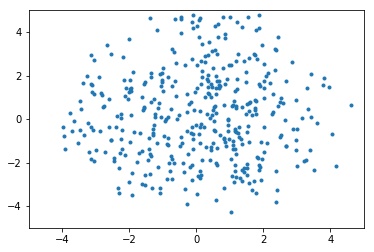

nb points: 400 min=(-4.14, -3.31) max=(4.76,4.92)


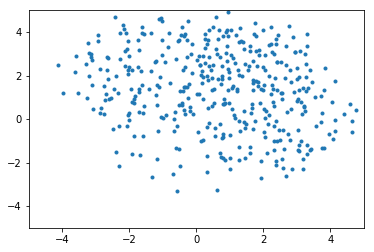

nb points: 400 min=(-4.54, -4.90) max=(4.76,4.17)


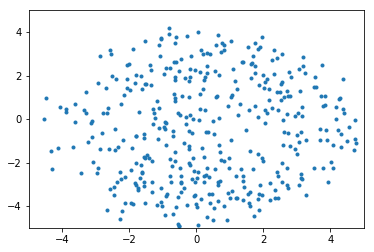

nb points: 400 min=(-4.01, -3.86) max=(3.29,3.53)


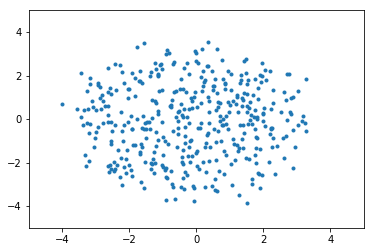

nb points: 400 min=(-3.03, -3.72) max=(3.75,3.43)


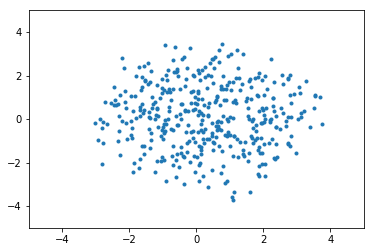

nb points: 400 min=(-4.06, -4.43) max=(3.43,3.73)


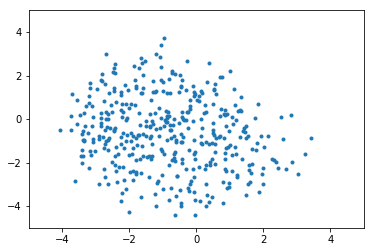

nb points: 400 min=(-4.92, -4.86) max=(4.84,4.84)


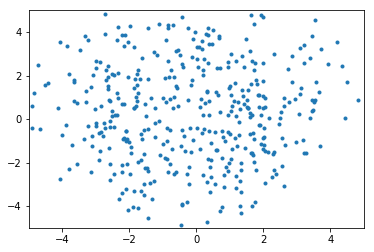

nb points: 400 min=(-3.95, -3.71) max=(3.10,3.59)


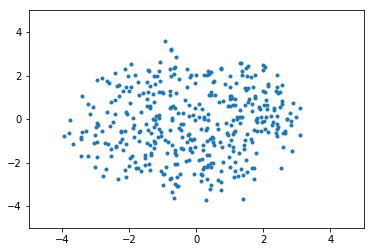

nb points: 400 min=(-4.75, -4.88) max=(4.89,4.93)


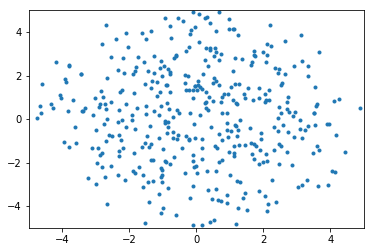

In [16]:
for folder in os.listdir(rnn_16_34) :
    plot_map(rnn_16_34 + '/' + folder + '/bd_004000.log' ,3)

In [8]:
rnn_32_33 = "/home/leni/sferes_log/legged_robot_exp/rnn_32_33/" 

Tripod 3DOF RNN 32
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_32_long_eval_15_10_10-25-56-6528
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_32_long_eval_15_10_10-25-56-6532
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_32_long_eval_15_10_10-25-56-6614
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_32_long_eval_15_10_10-25-56-6554
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_32_long_eval_15_10_10-25-56-6519
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_32_long_eval_15_10_10-25-56-6432
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_32_long_eval_15_10_10-25-56-6566
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_32_long_eval_15_10_10-25-56-6556
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_32_long_eval_15_10_10-25-56-6563


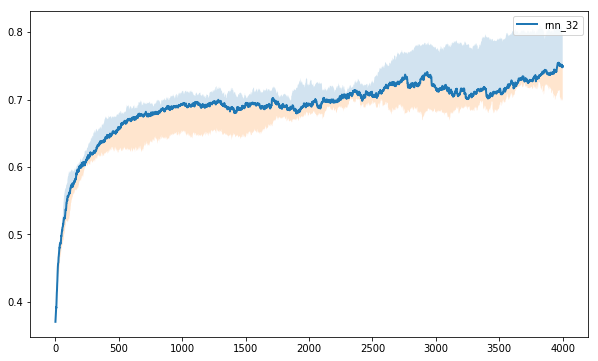

In [8]:
print("Tripod 3DOF RNN 32")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(rnn_32_33,3,"rnn",10,4001,"rnn_32",ax1)
plt.legend()
plt.show()

nb points: 400 min=(-3.89, -3.04) max=(4.09,4.22)


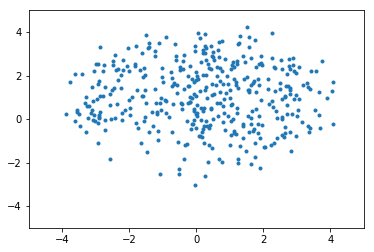

nb points: 400 min=(-4.89, -3.89) max=(3.79,4.44)


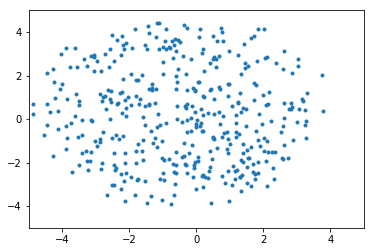

nb points: 400 min=(-4.79, -4.75) max=(3.57,4.50)


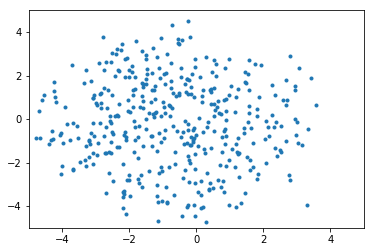

nb points: 400 min=(-4.44, -3.74) max=(3.95,4.54)


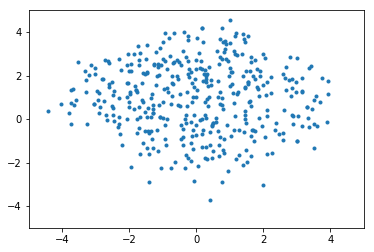

nb points: 400 min=(-4.56, -4.10) max=(3.39,4.56)


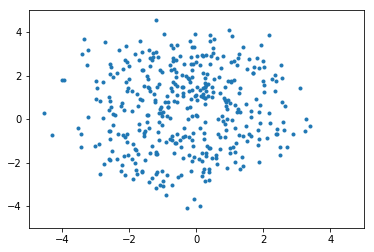

nb points: 400 min=(-4.62, -3.24) max=(3.89,4.55)


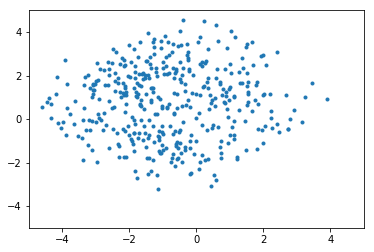

nb points: 400 min=(-4.89, -4.91) max=(4.91,4.93)


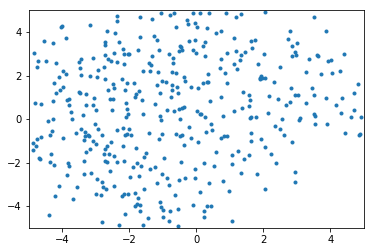

nb points: 400 min=(-3.14, -2.95) max=(2.85,3.83)


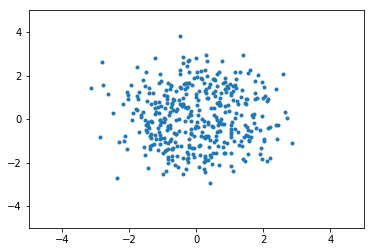

nb points: 400 min=(-3.83, -4.09) max=(3.10,2.81)


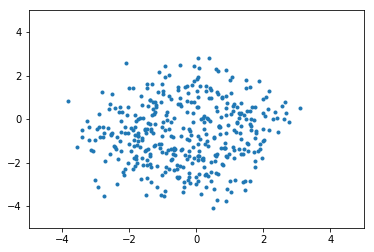

In [11]:
for folder in os.listdir(rnn_32_33) :
    plot_map(rnn_32_33 + '/' + folder + '/bd_004000.log' ,3)

In [4]:
rnn_16_32 = "/media/leni/Data/Experiment_Logs/rnn_16_32/"
rnn_16_33 = "/media/leni/Data/Experiment_Logs/rnn_16_33/"
rnn_16_34 = "/media/leni/Data/Experiment_Logs/rnn_16_34/"

legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_25_9_13-15-5
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_25_9_13-15-6
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_25_9_13-15-7
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_25_9_13-15-8
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_28_9_16-56-22-2449
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_28_9_16-56-22-2450
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_28_9_16-56-23-3604
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_28_9_16-56-23-3682
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_28_9_16-56-23-3721
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_28_9_16-56-23-3753
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_28_9_16-56-24-4582
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_28_9_16-56-24-4638
legged_robot_novelty_rnn_thr

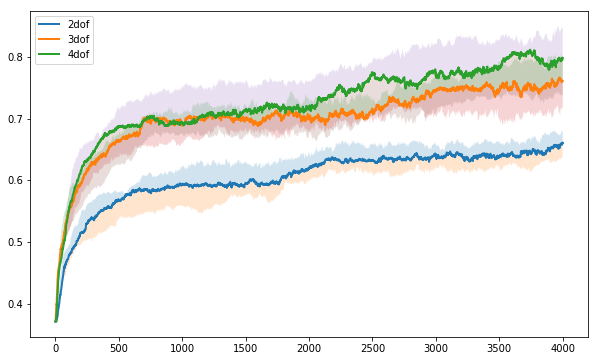

In [16]:
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(rnn_16_32,3,"rnn",14,4001,"2dof",ax1)
plot_data_from(rnn_16_33,3,"rnn",10,4001,"3dof",ax1)
plot_data_from(rnn_16_34,3,"rnn",10,4001,"4dof",ax1)
plt.legend()
plt.show()

In [3]:
rnn_32_32 = "/media/leni/Data/Experiment_Logs/rnn_32_32/"
rnn_32_33 = "/media/leni/Data/Experiment_Logs/rnn_32_33/"
rnn_32_34 = "/media/leni/Data/Experiment_Logs/rnn_32_34/"

legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_30_9_13-42-34-4967
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_30_9_13-42-34-4971
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_30_9_13-42-34-4972
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_30_9_13-42-34-4988
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_30_9_13-42-34-4990
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_30_9_13-42-34-4992
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_30_9_13-42-34-5000
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_30_9_13-42-35-5003
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_30_9_13-42-35-5008
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_30_9_13-42-35-5011
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_32_long_eval_15_10_10-25-56-6432
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_32_long_eval_15_10_10-25-56-6519
le

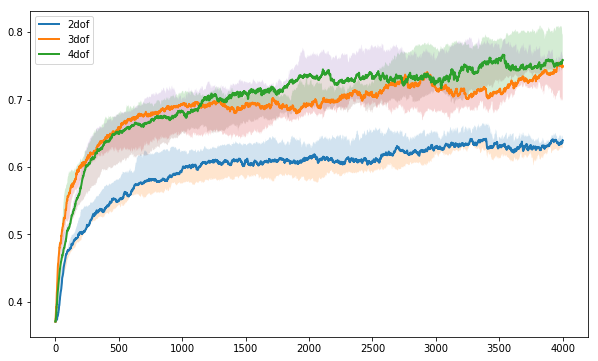

In [19]:
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(rnn_32_32,3,"rnn",10,4001,"2dof",ax1)
plot_data_from(rnn_32_33,3,"rnn",10,4001,"3dof",ax1)
plot_data_from(rnn_32_34,3,"rnn",10,4001,"4dof",ax1)
plt.legend()
plt.show()

In [27]:
rnn_64_32 = "/media/leni/Data/Experiment_Logs/rnn_64_32/"
rnn_64_33 = "/media/leni/Data/Experiment_Logs/rnn_64_33/"
rnn_64_34 = "/media/leni/Data/Experiment_Logs/rnn_64_34/"

legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_64_long_eval_30_9_13-43-33-3119
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_64_long_eval_30_9_13-43-33-3125
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_64_long_eval_30_9_13-43-34-4142
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_64_long_eval_30_9_13-43-34-4145
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_64_long_eval_30_9_13-43-34-4290
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_64_long_eval_30_9_13-43-34-4295
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_64_long_eval_30_9_13-43-35-5414
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_64_long_eval_30_9_13-43-35-5442
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_64_long_eval_30_9_13-43-35-5663
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_64_long_eval_30_9_13-43-35-5670
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_64_long_eval_18_10_14-34-10-155
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_64_long_eval_18_10_14-34-11-1255
leg

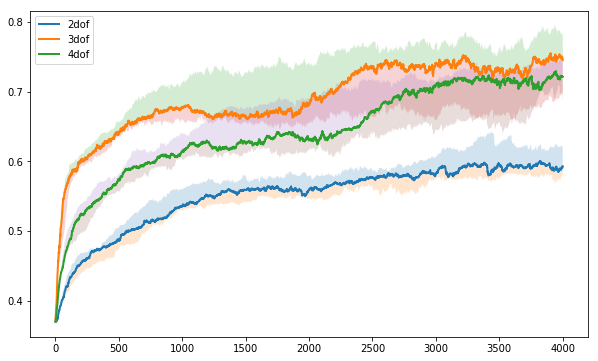

In [21]:
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(rnn_64_32,3,"rnn",10,4001,"2dof",ax1)
plot_data_from(rnn_64_33,3,"rnn",10,4001,"3dof",ax1)
plot_data_from(rnn_64_34,3,"rnn",10,4001,"4dof",ax1)
plt.legend()
plt.show()

In [34]:
neat_32 = "/home/leni/sferes_log/legged_robot_exp/neat_32_3/"
neat_33 = "/home/leni/sferes_log/legged_robot_exp/neat_33_2/"
neat_34 = "/home/leni/sferes_log/legged_robot_exp/neat_34_2/"
rnn_32_32 = "/media/leni/Data/Experiment_Logs/rnn_32_32/"
rnn_32_33 = "/media/leni/Data/Experiment_Logs/rnn_32_33/"
rnn_32_34 = "/media/leni/Data/Experiment_Logs/rnn_32_34/"
rnn_16_32 = "/media/leni/Data/Experiment_Logs/rnn_16_32/"
rnn_16_33 = "/media/leni/Data/Experiment_Logs/rnn_16_33/"
rnn_16_34 = "/media/leni/Data/Experiment_Logs/rnn_16_34/"
rnn_64_32 = "/media/leni/Data/Experiment_Logs/rnn_64_32/"
rnn_64_33 = "/home/leni/sferes_log/legged_robot_exp/rnn_64_33/"
rnn_64_34 = "/home/leni/sferes_log/legged_robot_exp/rnn_64_34/"

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-40-53
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9997
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9928
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9933
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-41-1046
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9312
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-40-894
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-41-1032
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9314
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-42-50-588
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-16-6248
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-18-8454
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-16-6320
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-16-6178
legged_rob

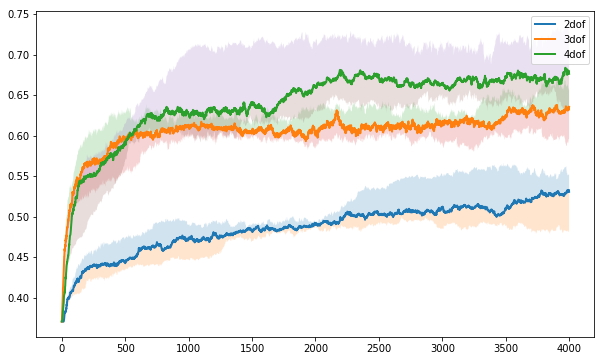

In [45]:
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(neat_32,3,"neat",10,4001,"2dof",ax1,"/JSDbd.dat")
plot_data_from(neat_33,3,"neat",10,4001,"3dof",ax1,"/JSDbd.dat")
plot_data_from(neat_34,3,"neat",10,4001,"4dof",ax1,"/JSDbd.dat")
plt.legend()
plt.show()

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-40-53
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9997
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9928
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9933
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-41-1046
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9312
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-40-894
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-41-1032
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9314
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_28_9_16-56-22-2449
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_28_9_16-56-22-2450
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_28_9_16-56-23-3604
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_28_9_16-56-23-3682
legged_robot_novelty_rnn_three_l

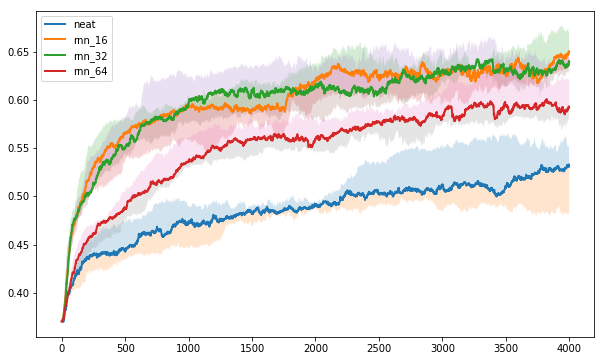

In [43]:
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(neat_32,3,"neat",10,4001,"neat",ax1,"/JSDbd.dat")
plot_data_from(rnn_16_32,3,"rnn",10,4001,"rnn_16",ax1,"/JSD.dat")
plot_data_from(rnn_32_32,3,"rnn",10,4001,"rnn_32",ax1,"/JSD.dat")
plot_data_from(rnn_64_32,3,"rnn",10,4001,"rnn_64",ax1,"/JSD.dat")
plt.legend()
plt.show()

legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-42-50-588
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-16-6248
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-18-8454
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-16-6320
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-16-6178
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-42-20-244
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-18-8490
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-42-20-415
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-16-6241
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_16_long_eval_12_10_14-44-10-201
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_16_long_eval_12_10_14-44-10-240
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_16_long_eval_12_10_14-44-11-1210
legged_robot_novelty_rnn_three_legs_3dof_nb_hidden_16_long_eval_12_10_14-44-11-1270
legged_robot_novelty_rnn_three

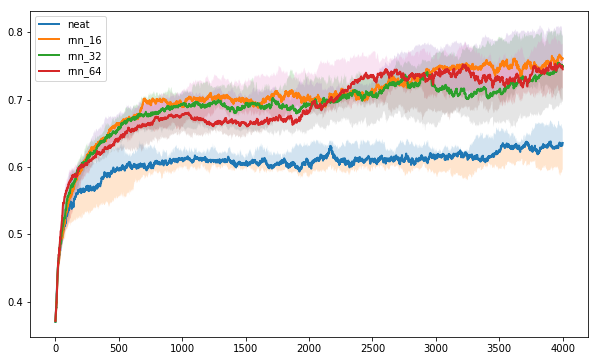

In [37]:
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(neat_33,3,"neat",10,4001,"neat",ax1,"/JSDbd.dat")
plot_data_from(rnn_16_33,3,"rnn",10,4001,"rnn_16",ax1,"/JSD.dat")
plot_data_from(rnn_32_33,3,"rnn",10,4001,"rnn_32",ax1,"/JSD.dat")
plot_data_from(rnn_64_33,3,"rnn",10,4001,"rnn_64",ax1,"/JSDbd.dat")
plt.legend()
plt.show()

legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4302
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4280
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-6-5-5047
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_15-52-55-5797
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-6-5-5169
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_15-52-54-4242
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4299
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4154
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_15-52-55-5409
legged_robot_novelty_rnn_three_legs_4dof_nb_hidden_16_long_eval_12_10_14-44-27-7143
legged_robot_novelty_rnn_three_legs_4dof_nb_hidden_16_long_eval_12_10_14-44-27-7259
legged_robot_novelty_rnn_three_legs_4dof_nb_hidden_16_long_eval_12_10_14-44-28-8152
legged_robot_novelty_rnn_three_legs_4dof_nb_hidden_16_long_eval_12_10_14-44-28-8253
legged_robot_novelty_rnn_three_le

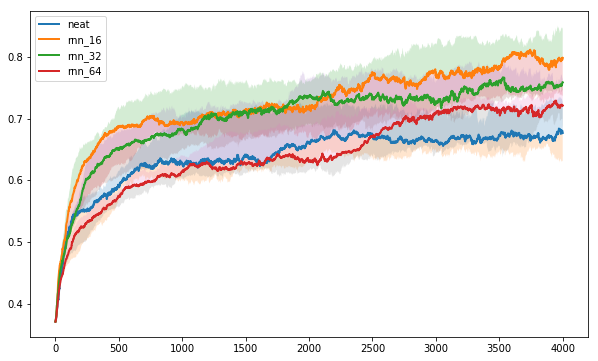

In [42]:
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(neat_34,3,"neat",10,4001,"neat",ax1,"/JSDbd.dat")
plot_data_from(rnn_16_34,3,"rnn",10,4001,"rnn_16",ax1,"/JSD.dat")
plot_data_from(rnn_32_34,3,"rnn",10,4001,"rnn_32",ax1,"/JSD.dat")
plot_data_from(rnn_64_34,3,"rnn",10,4001,"rnn_64",ax1,"/JSDbd.dat")
plt.legend()
plt.show()

In [7]:
neat_33_eval_all = "/home/leni/sferes_log/legged_robot_exp/neat_33_eval_all/"

Tripod 2DOF DNN EVAL ALL
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-7-22-2636
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-9-56-6977
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-9-56-6715
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-7-29-9157
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-7-23-3535
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-7-29-9085
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-9-56-6835
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-9-56-6869


/usr/lib/python3/dist-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


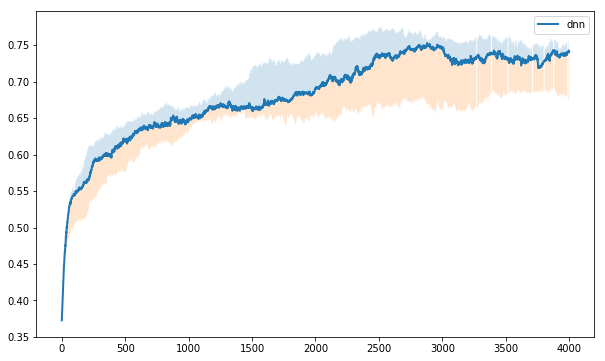

In [11]:
print("Tripod 3DOF DNN EVAL ALL")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(neat_33_eval_all,3,"neat",10,4001,"dnn",ax1)
plt.legend()
plt.show()

Plot of number of neurons and connections in DNN
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-7-22-2636
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-9-56-6977
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-9-56-6715
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-7-29-9157
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-7-23-3535
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-7-29-9085
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-9-56-6835
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-9-56-6869


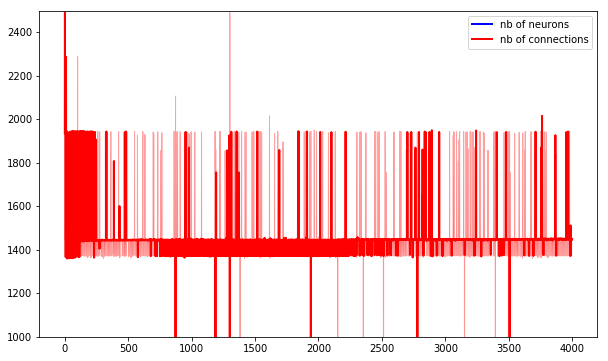

legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-7-22-2636
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-9-56-6977
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-9-56-6715
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-7-29-9157
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-7-23-3535
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-7-29-9085
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-9-56-6835
legged_robot_novelty_neat_three_legs_3dof_long_eval_ea_eval_all_3_0_15-9-56-6869


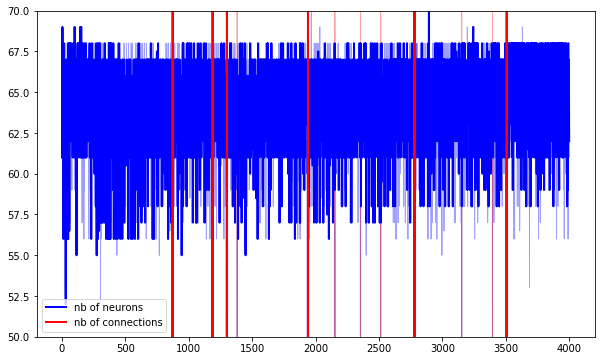

In [60]:
print("Plot of number of neurons and connections in DNN")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
ax1.set_ylim([1000,2500])
plot_dnn_data_from(neat_33_eval_all,3,"neat",4001,400,ax1)
plt.legend()
plt.show()
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
ax1.set_ylim([50,70])
plot_dnn_data_from(neat_33_eval_all,3,"neat",4001,400,ax1)
plt.legend()
plt.show()

nb points: 400 min=(-4.78, -3.55) max=(3.83,4.39)


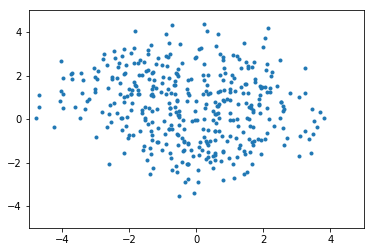

nb points: 400 min=(-4.79, -4.79) max=(3.88,4.59)


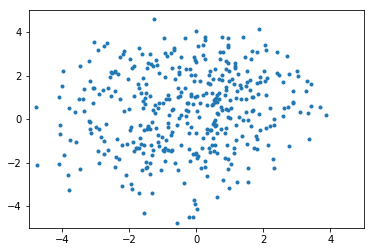

nb points: 400 min=(-3.80, -4.71) max=(3.82,3.50)


nb points: 400 min=(-4.39, -4.10) max=(3.76,4.61)


nb points: 400 min=(-3.41, -4.10) max=(3.41,4.37)


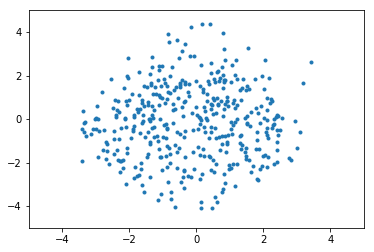

nb points: 400 min=(-4.72, -4.17) max=(3.12,3.86)


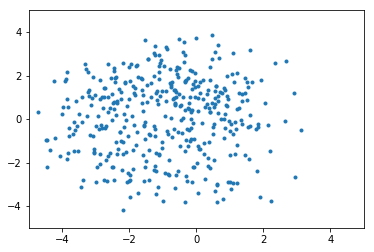

nb points: 400 min=(-4.73, -2.54) max=(4.13,4.73)


nb points: 400 min=(-3.81, -2.60) max=(3.32,4.51)


In [59]:
for folder in os.listdir(neat_33_eval_all) :
    plot_map(neat_33_eval_all + '/' + folder + '/bd_004000.log' ,3)

In [27]:
neat_34_eval_all = "/home/leni/sferes_log/legged_robot_exp/neat_34_eval_all/"

In [75]:
print("Tripod 4DOF DNN EVAL ALL")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(neat_34_eval_all,3,"neat",6,4001,"dnn",ax1)
plt.legend()
plt.show()

Tripod 4DOF DNN EVAL ALL
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3781
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3758
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3675
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3760
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3699
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3671
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3689
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3690
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3706


/usr/lib/python3/dist-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [76]:
print("Plot of number of neurons and connections in DNN")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
ax1.set_ylim([1000,3500])
plot_dnn_data_from(neat_34_eval_all,3,"neat",4001,400,ax1)
plt.legend()
plt.show()
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
ax1.set_ylim([60,80])
plot_dnn_data_from(neat_34_eval_all,3,"neat",4001,400,ax1)
plt.legend()
plt.show()

Plot of number of neurons and connections in DNN
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3781
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3758
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3675
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3760
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3699
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3671
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3689
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3690
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3706


legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3781
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3758
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3675
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3760
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3699
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3671
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3689
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3690
legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3706


nb points: 400 min=(-3.16, -3.76) max=(3.37,2.76)


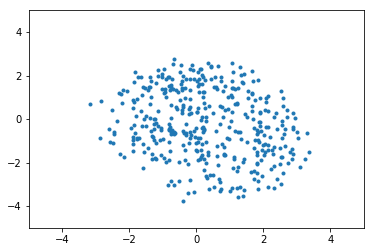

/home/leni/sferes_log/legged_robot_exp/neat_34_eval_all//legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3758/bd_004000.log does not exist
nb points: 400 min=(-4.51, -4.26) max=(3.70,4.64)


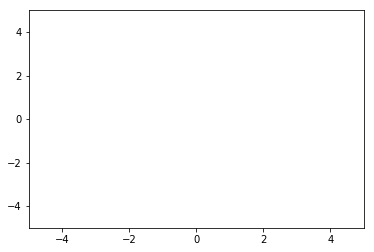

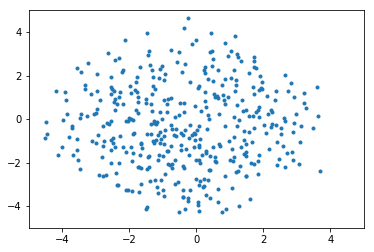

/home/leni/sferes_log/legged_robot_exp/neat_34_eval_all//legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3760/bd_004000.log does not exist
/home/leni/sferes_log/legged_robot_exp/neat_34_eval_all//legged_robot_novelty_neat_three_legs_4dof_long_eval_ea_eval_all_5_0_11-4-43-3699/bd_004000.log does not exist
nb points: 400 min=(-3.77, -3.80) max=(2.92,3.71)


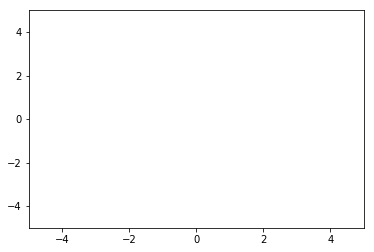

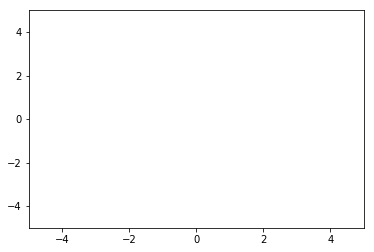

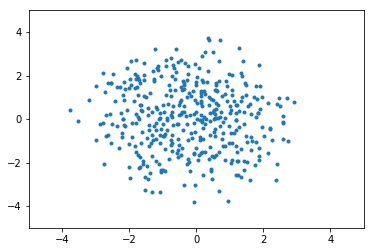

nb points: 400 min=(-2.88, -3.11) max=(2.85,2.46)


nb points: 400 min=(-3.95, -3.39) max=(3.17,3.27)


nb points: 400 min=(-3.61, -3.53) max=(2.73,3.65)


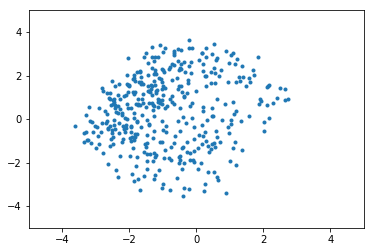

In [69]:
for folder in os.listdir(neat_34_eval_all) :
    plot_map(neat_34_eval_all + '/' + folder + '/bd_004000.log' ,3)

In [62]:
rnn_16_32_eval_all = "/home/leni/sferes_log/legged_robot_exp/rnn_16_32_eval_all/"

In [40]:
print("Tripod 2DOF RNN 16 EVAL ALL")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(rnn_16_32_eval_all,3,"rnn",10,4001,"dnn",ax1)
plt.legend()
plt.show()

Tripod 2DOF DNN EVAL ALL
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_ea_eval_all_8_0_11-48-47-7295
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_ea_eval_all_8_0_11-48-48-8835
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_ea_eval_all_8_0_11-48-47-7156
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_ea_eval_all_8_0_11-48-49-9281
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_ea_eval_all_8_0_11-48-48-8696
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_ea_eval_all_8_0_11-48-49-9018
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_ea_eval_all_8_0_11-48-48-8453
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_ea_eval_all_8_0_11-48-47-7877
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_ea_eval_all_8_0_11-48-50-165
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_ea_eval_all_8_0_11-48-50-431


nb points: 400 min=(-3.06, -3.60) max=(2.78,2.48)


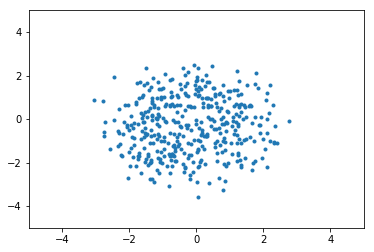

nb points: 400 min=(-3.06, -3.09) max=(3.36,2.88)


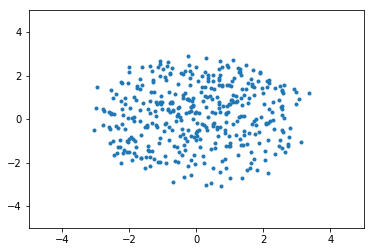

nb points: 400 min=(-3.27, -3.12) max=(3.07,2.68)


nb points: 400 min=(-3.33, -2.83) max=(3.19,3.33)


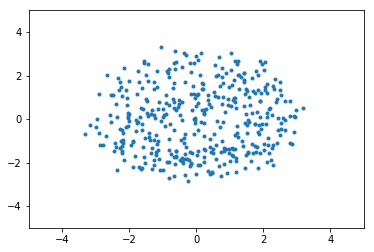

nb points: 400 min=(-2.56, -2.87) max=(2.93,2.55)


nb points: 400 min=(-1.63, -1.34) max=(1.85,1.97)


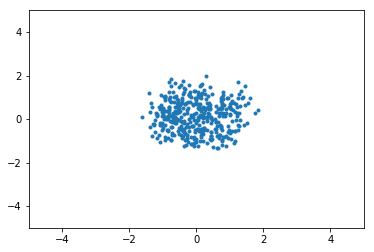

nb points: 400 min=(-3.10, -3.03) max=(3.15,2.60)


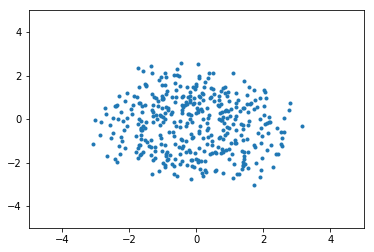

nb points: 400 min=(-2.93, -2.62) max=(2.91,2.86)


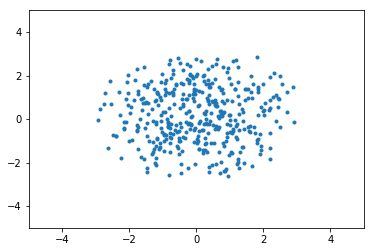

nb points: 400 min=(-2.65, -2.97) max=(2.95,3.16)


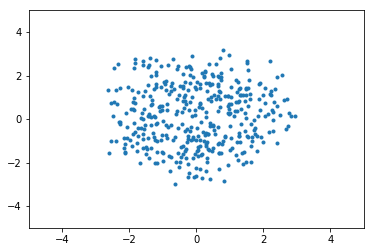

nb points: 400 min=(-3.33, -3.10) max=(3.05,3.32)


In [42]:
for folder in os.listdir(rnn_16_32_eval_all) :
    plot_map(rnn_16_32_eval_all + '/' + folder + '/bd_004000.log' ,3)

In [46]:
rnn_32_32_eval_all = "/home/leni/sferes_log/legged_robot_exp/rnn_32_32_eval_all/"

In [48]:
print("Tripod 2DOF RNN 32 EVAL ALL")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(rnn_32_32_eval_all,3,"rnn",10,4001,"dnn",ax1)
plt.legend()
plt.show()

Tripod 2DOF DNN EVAL ALL
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_ea_eval_all_8_0_11-49-11-1323
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_ea_eval_all_8_0_11-49-8-8852
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_ea_eval_all_8_0_11-49-10-34
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_ea_eval_all_8_0_11-49-10-239
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_ea_eval_all_8_0_11-49-9-9908
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_ea_eval_all_8_0_11-49-10-945
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_ea_eval_all_8_0_11-49-8-8882
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_ea_eval_all_8_0_11-49-11-1088


nb points: 400 min=(-2.53, -2.34) max=(2.16,2.70)


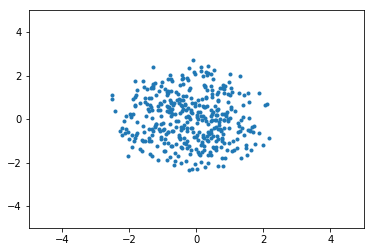

nb points: 400 min=(-2.80, -2.87) max=(3.50,2.52)


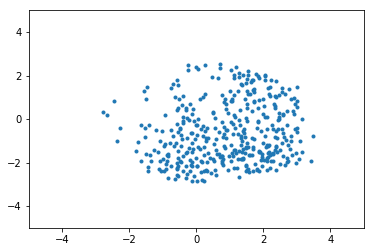

nb points: 400 min=(-2.51, -2.21) max=(2.41,2.35)


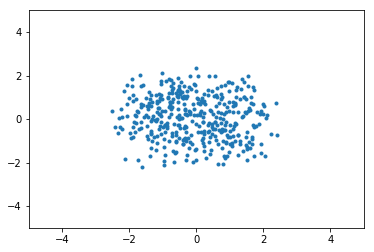

nb points: 400 min=(-2.84, -2.43) max=(2.09,2.12)


nb points: 400 min=(-2.59, -2.89) max=(2.82,3.00)


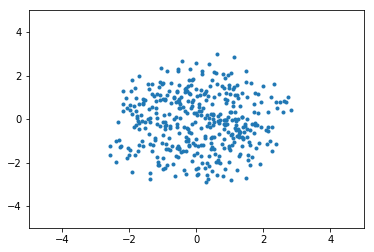

nb points: 400 min=(-3.40, -3.53) max=(3.38,2.91)


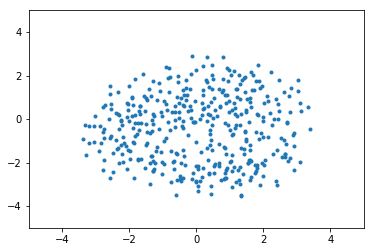

nb points: 400 min=(-2.58, -3.07) max=(2.94,2.80)


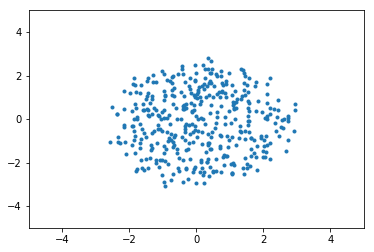

nb points: 400 min=(-2.60, -2.71) max=(3.05,3.11)


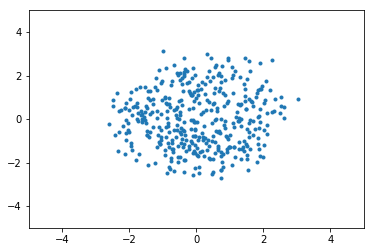

In [51]:
for folder in os.listdir(rnn_32_32_eval_all) :
    plot_map(rnn_32_32_eval_all + '/' + folder + '/bd_004000.log' ,3)

In [12]:
neat_32_3 = "/home/leni/sferes_log/legged_robot_exp/neat_32_3/"

Tripod 2DOF DNN
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-40-53
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9997
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9928
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9933
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-41-1046
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9312
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-40-894
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-41-1032
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9314


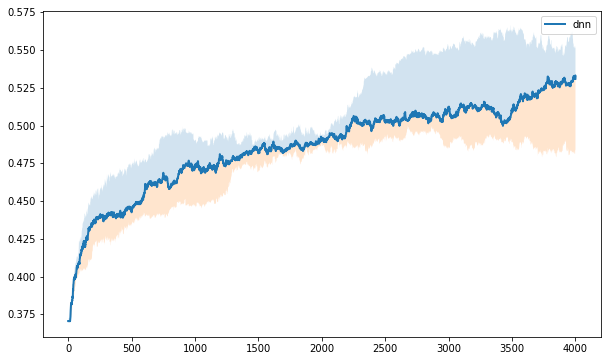

In [46]:
print("Tripod 2DOF DNN")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(neat_32_3,3,"neat",10,4001,"dnn",ax1,"/JSD.dat")
plt.legend()
plt.show()

Plot of number of neurons and connections in DNN
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-40-53
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9997
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9928
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9933
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-41-1046
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9312
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-40-894
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-41-1032
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9314


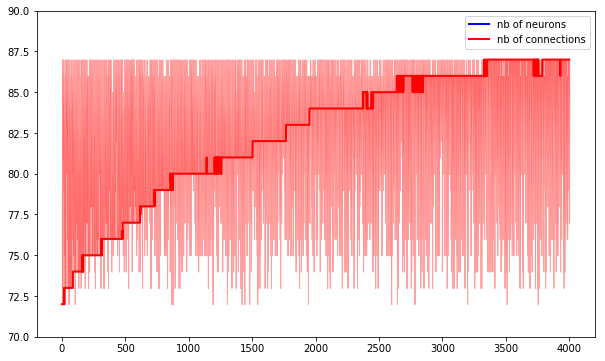

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-40-53
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9997
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9928
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9933
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-41-1046
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9312
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-40-894
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-41-1032
legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9314


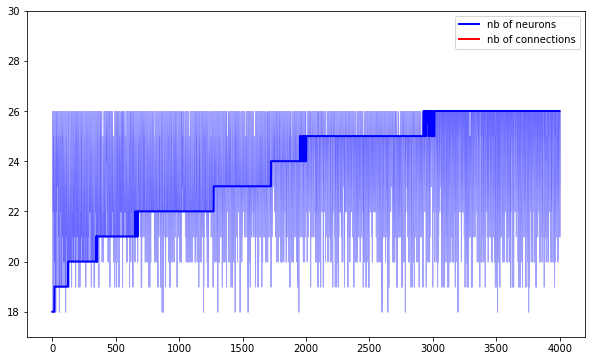

In [48]:
print("Plot of number of neurons and connections in DNN")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
ax1.set_ylim([70,90])
plot_dnn_data_from(neat_32_3,3,"neat",4001,400,ax1)
plt.legend()
plt.show()
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
ax1.set_ylim([17,30])
plot_dnn_data_from(neat_32_3,3,"neat",4001,400,ax1)
plt.legend()
plt.show()

nb points: 400 min=(-1.16, -1.83) max=(2.99,1.80)


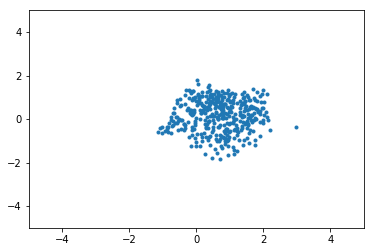

nb points: 400 min=(-2.03, -2.40) max=(2.66,1.79)


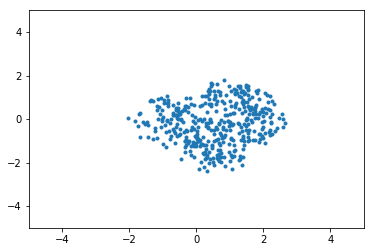

nb points: 400 min=(-2.22, -2.30) max=(2.35,2.09)


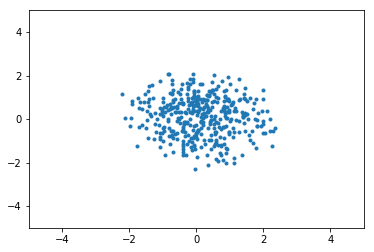

nb points: 400 min=(-2.78, -2.82) max=(2.99,2.82)


nb points: 400 min=(-1.45, -1.55) max=(1.70,1.48)


nb points: 400 min=(-2.13, -1.84) max=(2.16,1.42)


nb points: 400 min=(-1.97, -1.97) max=(2.47,2.33)


nb points: 400 min=(-1.82, -1.77) max=(1.58,1.70)


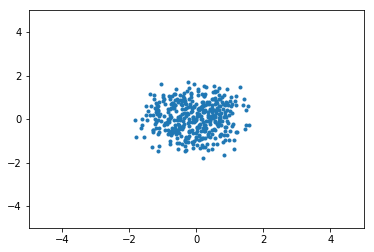

nb points: 400 min=(-3.43, -3.10) max=(3.12,2.95)


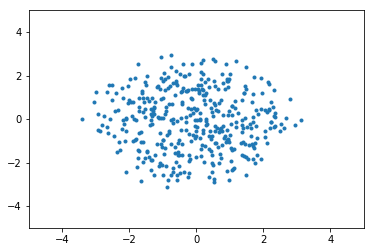

In [45]:
for folder in os.listdir(neat_32_3) :
    plot_map(neat_32_3 + '/' + folder + '/bd_004000.log',3)

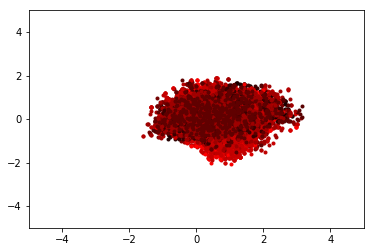

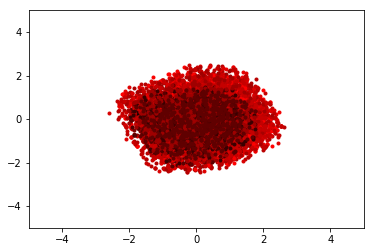

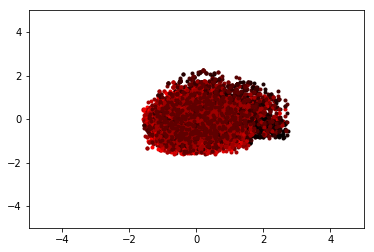

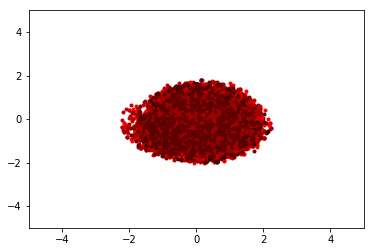

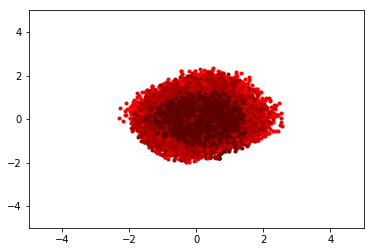

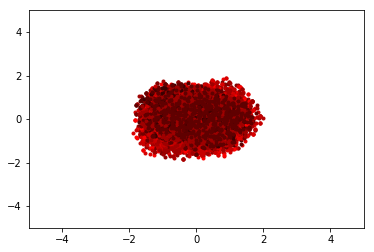

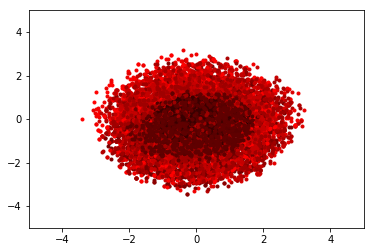

In [42]:
for folder in os.listdir(neat_32_3) :
    plot_map_hm(neat_32_3 + '/' + folder,3,"bd")

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-40-53


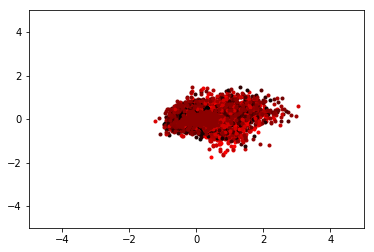

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9997


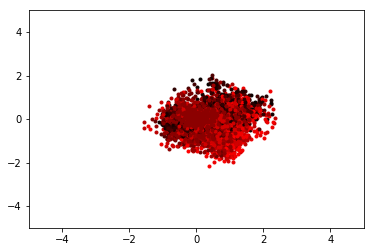

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9928


legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9933


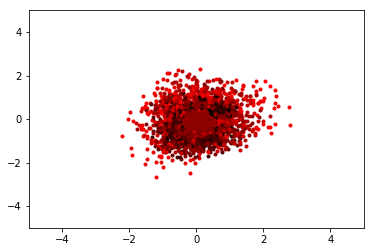

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-41-1046


legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9312


legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-40-894


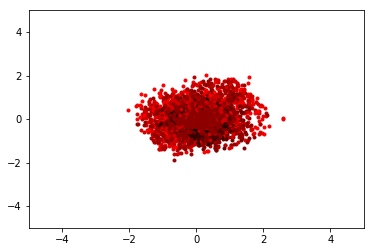

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-41-1032


legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9314


In [41]:
for folder in os.listdir(neat_32_3) :
    print(folder)
    plot_map_hm(neat_32_3 + '/' + folder,3,"child")

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-40-53


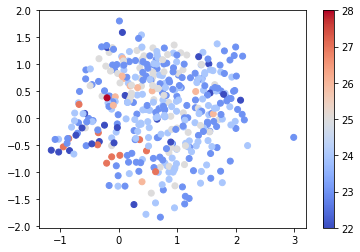

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9997


legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9928


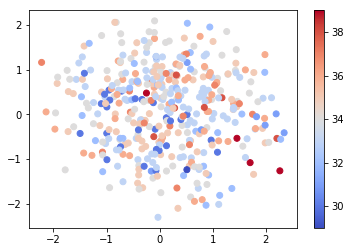

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9933


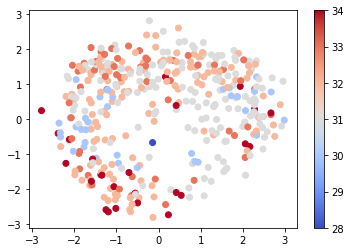

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-41-1046


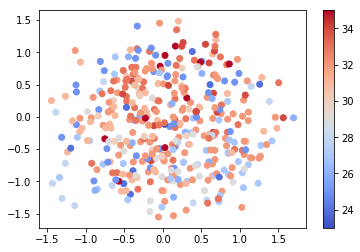

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9312


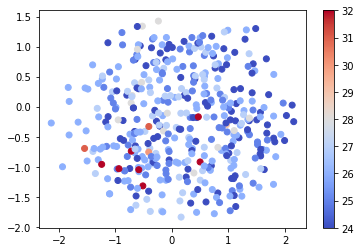

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-40-894


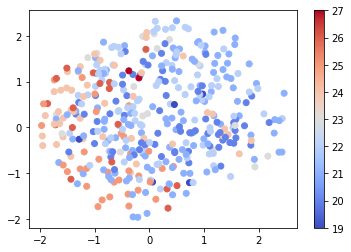

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-41-1032


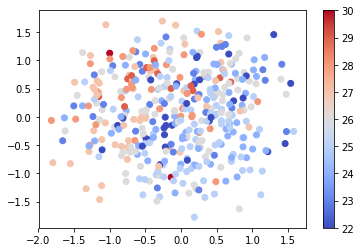

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9314


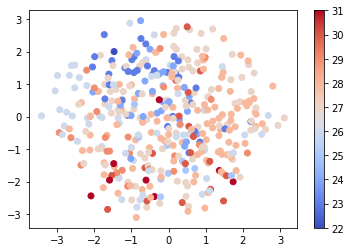

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-40-53


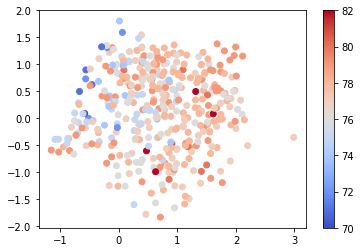

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9997


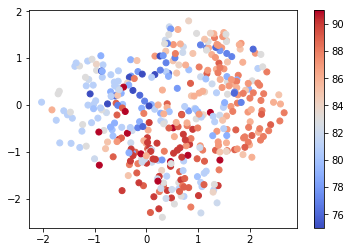

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9928


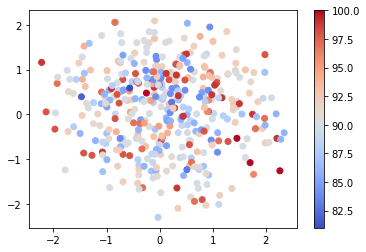

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9933


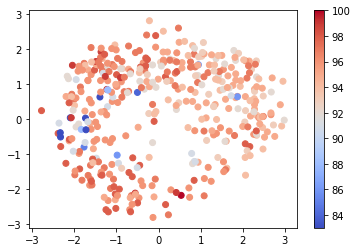

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-41-1046


legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9312


legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-40-894


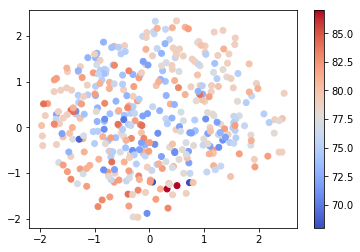

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-41-1032


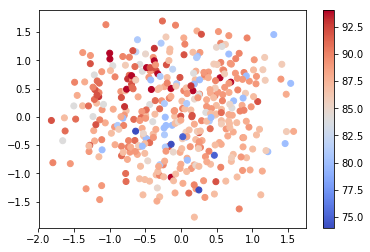

legged_robot_novelty_neat_three_legs_2dof_long_eval_12_0_17-18-39-9314


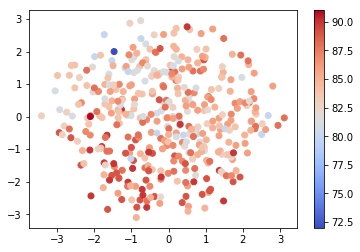

In [50]:
plot_map_dnn_from(neat_32_3,3,'neat',True)
plot_map_dnn_from(neat_32_3,3,'neat',False)

In [15]:
neat_33_2 = "/home/leni/sferes_log/legged_robot_exp/neat_33_2/"

In [10]:
print("Tripod 3DOF DNN")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(neat_33_2,3,"neat",10,4001,"dnn",ax1,"/JSDbd.dat")
plt.legend()
plt.show()

Tripod 3DOF DNN
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-42-50-588
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-16-6248
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-18-8454
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-16-6320
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-16-6178
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-42-20-244
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-18-8490
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-42-20-415
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-16-6241


Plot of number of neurons and connections in DNN
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-42-50-588
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-16-6248
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-18-8454
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-16-6320
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-16-6178
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-42-20-244
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-18-8490
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-42-20-415
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-16-6241


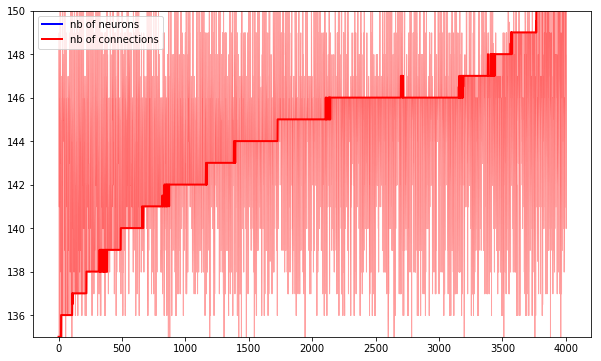

legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-42-50-588
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-16-6248
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-18-8454
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-16-6320
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-16-6178
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-42-20-244
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-18-8490
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-42-20-415
legged_robot_novelty_neat_three_legs_3dof_long_eval_13_0_11-40-16-6241


In [18]:
print("Plot of number of neurons and connections in DNN")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
ax1.set_ylim([135,150])
plot_dnn_data_from(neat_33_2,3,"neat",4001,400,ax1)
plt.legend()
plt.show()
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
ax1.set_ylim([22,33])
plot_dnn_data_from(neat_33_2,3,"neat",4001,400,ax1)
plt.legend()
plt.show()

nb points: 400 min=(-2.83, -2.84) max=(2.45,2.48)


nb points: 400 min=(-2.52, -2.02) max=(2.62,2.77)


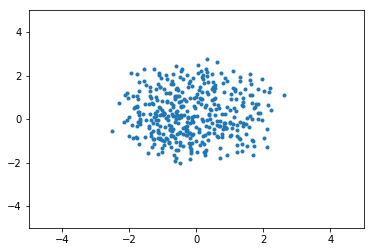

nb points: 400 min=(-3.36, -3.57) max=(3.44,2.87)


nb points: 400 min=(-3.41, -3.73) max=(3.18,4.39)


nb points: 400 min=(-2.91, -2.63) max=(2.73,2.64)


nb points: 400 min=(-3.44, -2.14) max=(3.34,3.90)


nb points: 400 min=(-3.21, -3.17) max=(3.07,3.96)


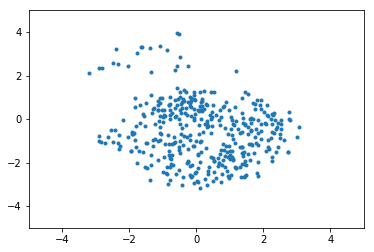

nb points: 400 min=(-3.82, -3.90) max=(2.43,3.75)


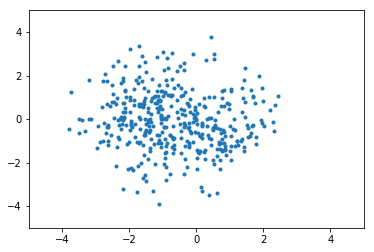

nb points: 400 min=(-2.87, -3.16) max=(2.94,3.28)


In [12]:
for folder in os.listdir(neat_33_2) :
    plot_map(neat_33_2 + '/' + folder + '/bd_004000.log',3)

In [9]:
neat_34_2 = "/home/leni/sferes_log/legged_robot_exp/neat_34_2/"

Tripod 4DOF DNN
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4302
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4280
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-6-5-5047
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_15-52-55-5797
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-6-5-5169
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_15-52-54-4242
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4299
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4154
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_15-52-55-5409


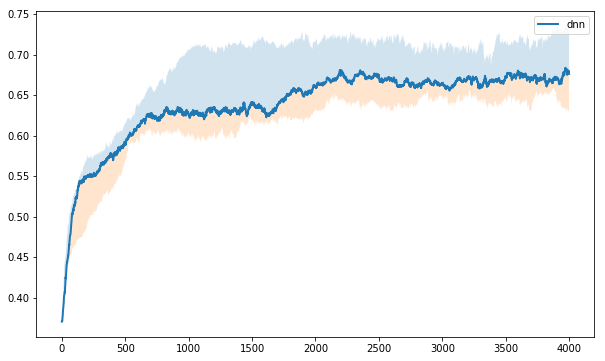

In [41]:
print("Tripod 4DOF DNN")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(neat_34_2,3,"neat",10,4001,"dnn",ax1,"/JSDbd.dat")
plt.legend()
plt.show()

legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4302


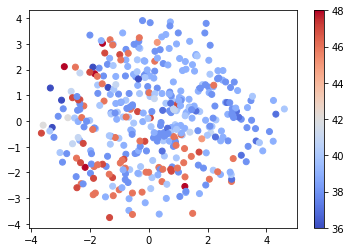

legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4280


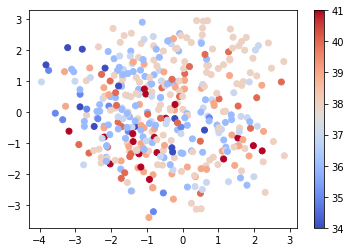

legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-6-5-5047


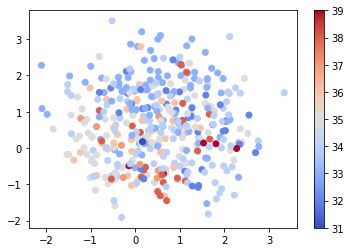

legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_15-52-55-5797


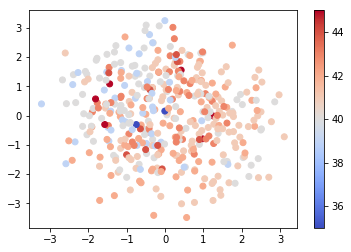

legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-6-5-5169


legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_15-52-54-4242


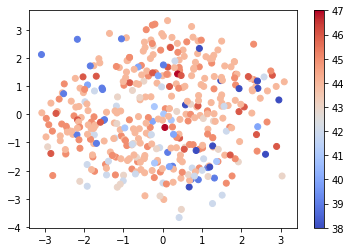

legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4299


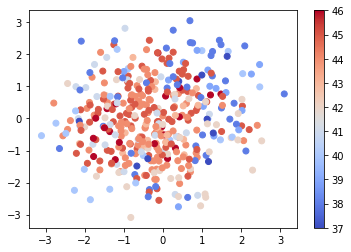

legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4154


legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_15-52-55-5409


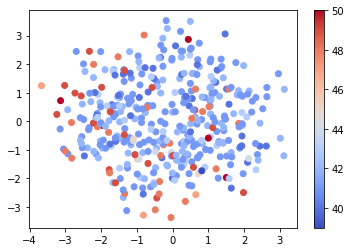

legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4302


legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4280


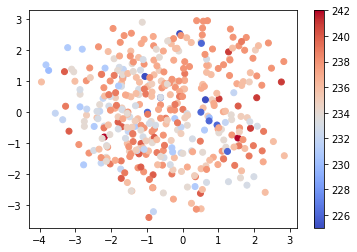

legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-6-5-5047


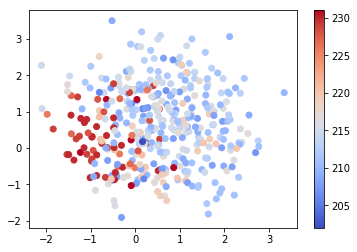

legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_15-52-55-5797


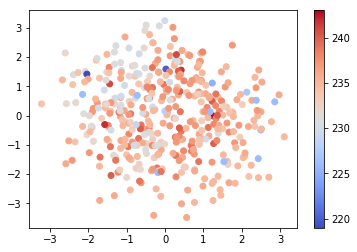

legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-6-5-5169


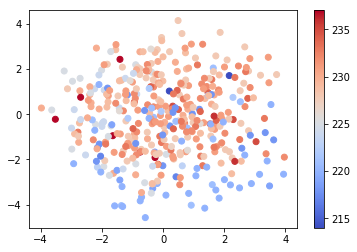

legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_15-52-54-4242


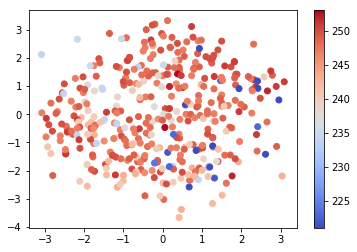

legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4299


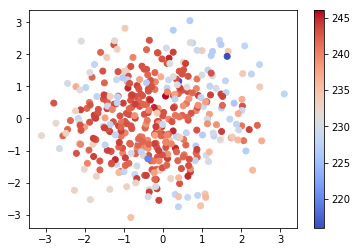

legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4154


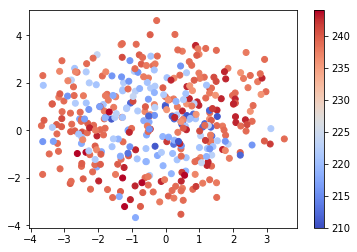

legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_15-52-55-5409


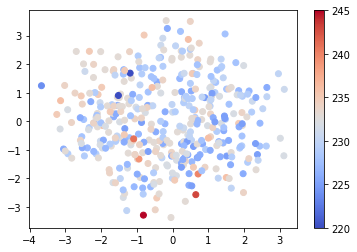

In [45]:
plot_map_dnn_from(neat_34_2,3,'neat',True)
plot_map_dnn_from(neat_34_2,3,'neat',False)

Plot of number of neurons and connections in DNN
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4302
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4280
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-6-5-5047
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_15-52-55-5797
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-6-5-5169
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_15-52-54-4242
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4299
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4154
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_15-52-55-5409


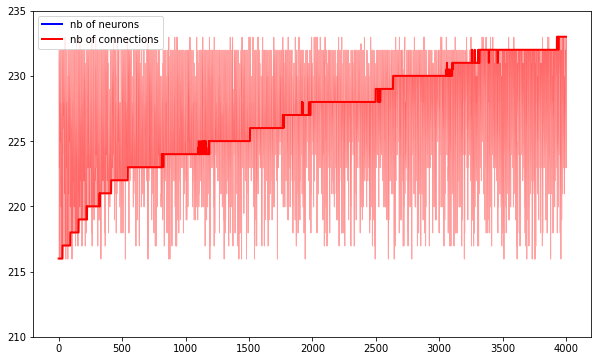

legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4302
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4280
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-6-5-5047
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_15-52-55-5797
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-6-5-5169
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_15-52-54-4242
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4299
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_16-8-24-4154
legged_robot_novelty_neat_three_legs_4dof_long_eval_14_0_15-52-55-5409


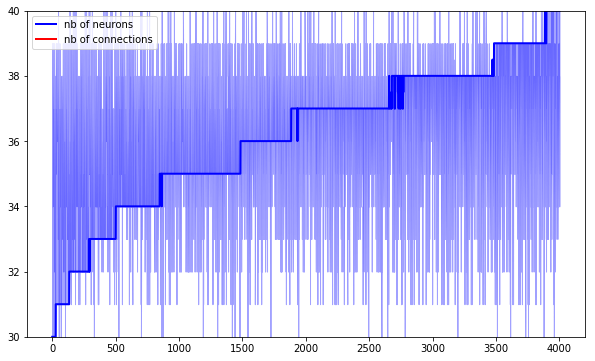

In [17]:
print("Plot of number of neurons and connections in DNN")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
ax1.set_ylim([210,235])
plot_dnn_data_from(neat_34_2,3,"neat",4001,400,ax1)
plt.legend()
plt.show()
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
ax1.set_ylim([30,40])
plot_dnn_data_from(neat_34_2,3,"neat",4001,400,ax1)
plt.legend()
plt.show()

In [11]:
neat_32_4 = "/home/leni/sferes_log/legged_robot_exp/neat_32_dart682/"

Tripod 2DOF DNN DART682
legged_robot_novelty_neat_three_legs_2dof_long_eval_20_0_17-53-33-3431
legged_robot_novelty_neat_three_legs_2dof_long_eval_20_0_17-53-36-6294
legged_robot_novelty_neat_three_legs_2dof_long_eval_20_0_17-53-36-6374
legged_robot_novelty_neat_three_legs_2dof_long_eval_20_0_17-53-36-6121
legged_robot_novelty_neat_three_legs_2dof_long_eval_20_0_17-53-39-9219
legged_robot_novelty_neat_three_legs_2dof_long_eval_20_0_17-53-32-2175
legged_robot_novelty_neat_three_legs_2dof_long_eval_20_0_17-53-39-9117
legged_robot_novelty_neat_three_legs_2dof_long_eval_20_0_17-53-39-9143


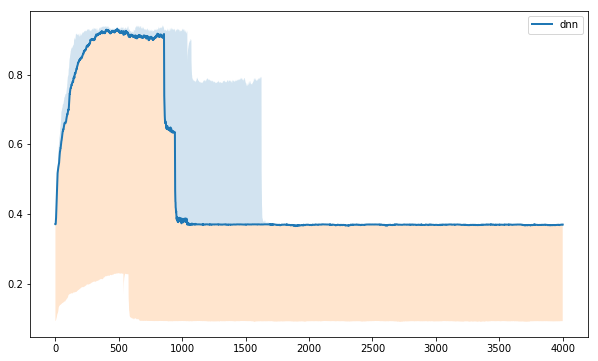

In [12]:
print("Tripod 2DOF DNN DART682")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(neat_32_4,3,"neat",10,4001,"dnn",ax1,"/JSDbd.dat")
plt.legend()
plt.show()

In [7]:
rnn_16_32_d682 = "/home/leni/sferes_log/legged_robot_exp/rnn_16_32_dart682/"

Tripod 2DOF RNN 16 DART682
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_21_0_9-24-25-5072
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_21_0_9-24-6-6634
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_20_0_17-54-1-1660
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_21_0_9-24-7-7571
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_21_0_9-26-24-4895
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_21_0_9-26-27-7168
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_20_0_17-54-0-406
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_20_0_17-53-59-9304
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_20_0_17-54-0-211
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_20_0_17-54-0-424


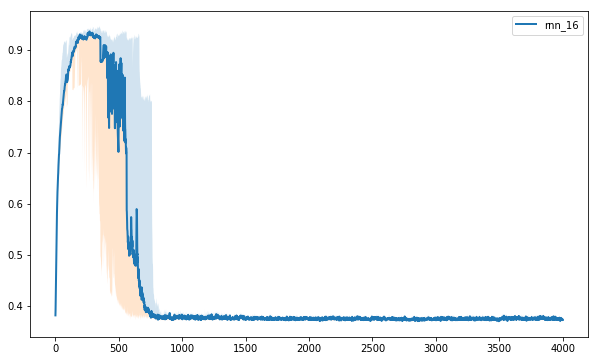

In [8]:
print("Tripod 2DOF RNN 16 DART682")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(rnn_16_32_d682,3,"rnn",10,4001,"rnn_16",ax1,"/JSDbd.dat")
plt.legend()
plt.show()

In [9]:
rnn_32_32_d682 = "/home/leni/sferes_log/legged_robot_exp/rnn_32_32_dart682/"

In [10]:
print("Tripod 2DOF RNN 16 DART682")
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(rnn_32_32_d682,3,"rnn",10,4001,"rnn_16",ax1,"/JSDbd.dat")
plt.legend()
plt.show()

Tripod 2DOF RNN 16 DART682
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_21_0_10-21-10-428
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_21_0_10-21-9-9083
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_21_0_10-21-8-8071
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_21_0_10-21-17-7151
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_21_0_10-21-9-9704
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_21_0_10-21-17-7150
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_21_0_10-21-6-6551
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_21_0_10-21-7-7718
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_21_0_10-23-25-5005
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_32_long_eval_21_0_10-21-9-9563


legged_robot_novelty_neat_three_legs_2dof_long_eval_20_0_17-53-33-3431
legged_robot_novelty_neat_three_legs_2dof_long_eval_20_0_17-53-36-6294
legged_robot_novelty_neat_three_legs_2dof_long_eval_20_0_17-53-36-6374
legged_robot_novelty_neat_three_legs_2dof_long_eval_20_0_17-53-36-6121
legged_robot_novelty_neat_three_legs_2dof_long_eval_20_0_17-53-39-9219
legged_robot_novelty_neat_three_legs_2dof_long_eval_20_0_17-53-32-2175
legged_robot_novelty_neat_three_legs_2dof_long_eval_20_0_17-53-39-9117
legged_robot_novelty_neat_three_legs_2dof_long_eval_20_0_17-53-39-9143
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_21_0_9-24-25-5072
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_21_0_9-24-6-6634
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_20_0_17-54-1-1660
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_21_0_9-24-7-7571
legged_robot_novelty_rnn_three_legs_2dof_nb_hidden_16_long_eval_21_0_9-26-24-4895
legged_robot_novelty_rnn

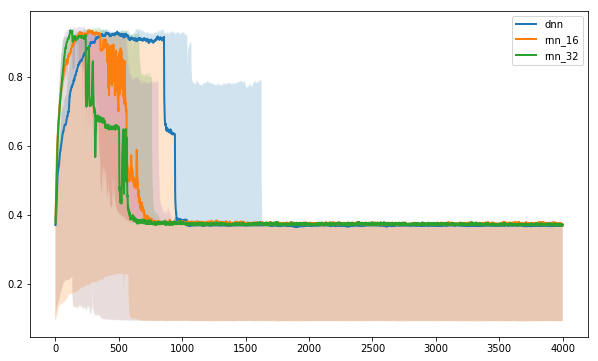

In [14]:
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(neat_32_4,3,"neat",10,4001,"dnn",ax1,"/JSDbd.dat")
plot_data_from(rnn_16_32_d682,3,"rnn",10,4001,"rnn_16",ax1,"/JSDbd.dat")
plot_data_from(rnn_32_32_d682,3,"rnn",10,4001,"rnn_32",ax1,"/JSDbd.dat")
plt.legend()
plt.show()

In [9]:
neat_32_rt = "/home/leni/sferes_log/legged_robot_exp/neat_32_rt/"
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(neat_32_rt,3,"neat",10,4001,"neat_rt",ax1,"/JSDbd.dat")
plot_data_from(neat_32_3,3,"neat",10,4001,"neat",ax1,"/JSDbd.dat")
plt.legend()
plt.show()

legged_robot_novelty_neat_three_legs_2dof_long_eval_18_0_17-45-59-9034
legged_robot_novelty_neat_three_legs_2dof_long_eval_18_0_17-45-57-7768
legged_robot_novelty_neat_three_legs_2dof_long_eval_18_0_17-45-57-7809
legged_robot_novelty_neat_three_legs_2dof_long_eval_18_0_17-45-59-9095
legged_robot_novelty_neat_three_legs_2dof_long_eval_18_0_17-45-57-7763
legged_robot_novelty_neat_three_legs_2dof_long_eval_18_0_17-48-14-4935
legged_robot_novelty_neat_three_legs_2dof_long_eval_18_0_17-45-59-9039
legged_robot_novelty_neat_three_legs_2dof_long_eval_18_0_17-45-59-9172


NameError: name 'neat_32_3' is not defined

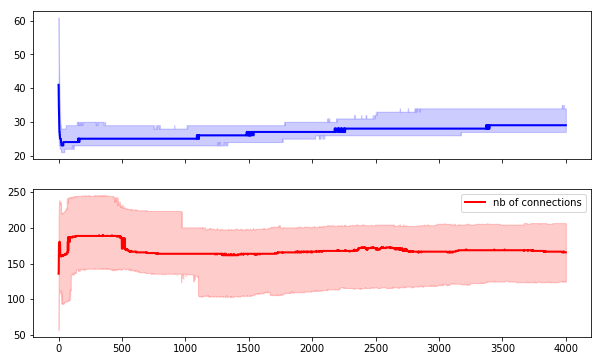

In [14]:
fig, axs = plt.subplots(2,sharex=True,figsize=(10,6))
plot_dnn_data(neat_32_rt,"legged",3,"neat",4001,400,axs)
plt.legend()
plt.show()

legged_robot_novelty_neat_three_legs_3dof_long_eval_18_0_17-46-13-3646
legged_robot_novelty_neat_three_legs_3dof_long_eval_18_0_17-46-11-1610
legged_robot_novelty_neat_three_legs_3dof_long_eval_18_0_17-46-12-2864
legged_robot_novelty_neat_three_legs_3dof_long_eval_18_0_17-46-12-2892
legged_robot_novelty_neat_three_legs_3dof_long_eval_18_0_17-46-13-3811
legged_robot_novelty_neat_three_legs_3dof_long_eval_18_0_17-46-9-9723
legged_robot_novelty_neat_three_legs_3dof_long_eval_18_0_17-46-11-1898
legged_robot_novelty_neat_three_legs_3dof_long_eval_18_0_17-46-13-3131
legged_robot_novelty_neat_three_legs_3dof_long_eval_18_0_17-46-20-360
legged_robot_novelty_neat_three_legs_3dof_long_eval_18_0_17-46-10-683


NameError: name 'neat_33_2' is not defined

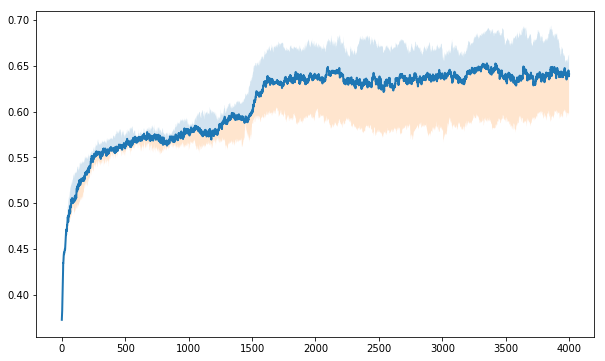

In [8]:
neat_33_rt = "/home/leni/sferes_log/legged_robot_exp/neat_33_rt/"
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(neat_33_rt,3,"neat",10,4001,"neat_rt",ax1,"/JSDbd.dat")
plot_data_from(neat_33_2,3,"neat",10,4001,"neat",ax1,"/JSDbd.dat")
plt.legend()
plt.show()

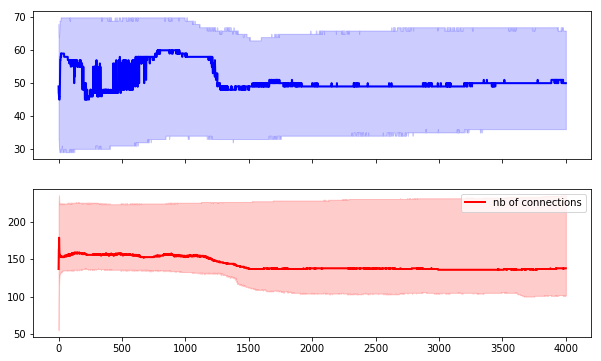

In [13]:
fig, axs = plt.subplots(2,sharex=True,figsize=(10,6))
plot_dnn_data(neat_33_rt,"legged",3,"neat",4001,400,axs)
plt.legend()
plt.show()

In [9]:
neat_32_long_run = "/home/leni/sferes_log/legged_robot_exp/neat_32_long_run/"
neat_33_long_run = "/home/leni/sferes_log/legged_robot_exp/neat_33_long_run/"

legged_robot_novelty_neat_three_legs_2dof_long_eval_long_run_27_0_12-27-23-3921
legged_robot_novelty_neat_three_legs_2dof_long_eval_long_run_27_0_12-27-20-750
legged_robot_novelty_neat_three_legs_2dof_long_eval_long_run_27_0_12-27-21-1069
legged_robot_novelty_neat_three_legs_2dof_long_eval_long_run_27_0_12-27-23-3872
legged_robot_novelty_neat_three_legs_2dof_long_eval_long_run_27_0_12-27-22-2129
legged_robot_novelty_neat_three_legs_2dof_long_eval_long_run_27_0_12-27-23-3912
legged_robot_novelty_neat_three_legs_2dof_long_eval_long_run_27_0_12-27-23-3174


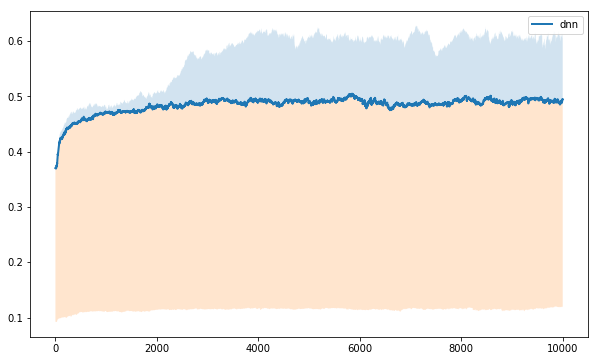

In [8]:
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(neat_32_long_run,3,"neat",10,10001,"dnn",ax1,"/JSDbd.dat")
plt.legend()
plt.show()

legged_robot_novelty_neat_three_legs_3dof_long_eval_long_run_27_0_12-25-7-7059
legged_robot_novelty_neat_three_legs_3dof_long_eval_long_run_27_0_12-25-9-9159
legged_robot_novelty_neat_three_legs_3dof_long_eval_long_run_27_0_12-25-7-7310
legged_robot_novelty_neat_three_legs_3dof_long_eval_long_run_27_0_12-25-7-7287
legged_robot_novelty_neat_three_legs_3dof_long_eval_long_run_27_0_12-25-7-7209
legged_robot_novelty_neat_three_legs_3dof_long_eval_long_run_27_0_12-25-7-7055
legged_robot_novelty_neat_three_legs_3dof_long_eval_long_run_27_0_12-25-7-7340
legged_robot_novelty_neat_three_legs_3dof_long_eval_long_run_27_0_12-25-7-7016


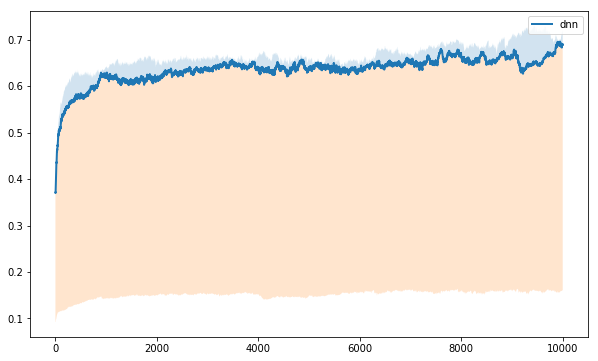

In [10]:
fig, ax1 = plt.subplots(1,sharex=True,figsize=(10,6))
plot_data_from(neat_33_long_run,3,"neat",10,10001,"dnn",ax1,"/JSDbd.dat")
plt.legend()
plt.show()